# Show me your plate and I tell you who you are

![](Pictures\photo-1506073869338-9d4cc16bae4c.jfif)

#### The Notebook is organized into multiple sub-section with different focal points, for ease of navigation, you can click on one of the links and we will take you there! Based on compatibility issues, we have seperate Notebooks for some GeoVizualization, as well as data aquisition and rough merging of the geodata based on package conflicts and single-use in our processing pipeline

- <a href='#DataLoading'>Data Loading, Cleaning and Joining</a>
- <a href='#Clustering'>Clustering</a>
- <a href='#WorkFlow'>Workflow and Factory Definition</a>
- <a href='#Stats'>Statistical Analysis</a>
- <a href='#Ensemble'>Ensemble Models</a>
- <a href='#AssociationRule'>Association Rule Mining</a>
- <a href='#DecisionTree'>Decision Tree Mining</a>
- <a href='#GeoViz'>GeoViz</a>
- The ugly ducklings archieve



#### Unified Package Loading Prelude

In [2]:
# Ever Greens
import pickle as pkl 
import pandas as pd 
import numpy as np 
import math 
from scipy import stats

# Plotly Package
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.io as pio
from plotly.subplots import make_subplots

### Association Rule Mining Packags
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

# Stats Model Package
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels as sml

## Sklearn Package
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, balanced_accuracy_score, f1_score, accuracy_score, classification_report, r2_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# DataViz Packages
from dtreeviz.trees import dtreeviz 
import matplotlib.pyplot as plt
import seaborn as sns

# Imbalance Learn 
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline, make_pipeline

# Tool Packages
from tqdm import tqdm
import os 
import itertools as it 
from pathlib import Path
import glob
import json
import geojson
from urllib.request import urlopen
from IPython.display import IFrame
import warnings
from bs4 import BeautifulSoup

# Turning down the 
warnings.simplefilter(action='ignore', category=FutureWarning)

py.init_notebook_mode(connected=True)
pio.renderers.default='notebook'

print("It is only Python if the preamble includes atleast 100 Package Loads, else it is just sparkling Ada")

It is only Python if the preamble includes atleast 100 Package Loads, else it is just sparkling Ada


#### Default Parameter for Uniform Styling

In [3]:
default_font = {'family': 'Franklin Gothic'}

## Defining Helper Functions and Factories for later usage

<a id='WorkFlow'></a>

#### Doing what the Kids nowadays call a Pro-Gamer Move

In [176]:
# Calling Systems Command in a Jupyter Notebook (Trust me I am an Engineer)

def github_hook():
    print("Hello, ... Hello, ... Vienna Calling?")
    %cd -q ../fierceeagle.github.io/
    # Adds the Plot if new Name
    print("Adding new Files ...")
    !git add *.html
    !git add *.svg
    print("Commiting Changes ...")
    !git commit -m"Added/Changed Plot" --quiet
    print("Pulling previous Changes ... ")
    !git pull --quiet
    print("Pushing to Remote...")
    !git push --quiet
    print("Finished")
    print("Rock me Amadeus")
    %cd -q ../ada-2020-project-milestone-p3-p3_binging_with_babbage/
    

In [5]:
# Helper function that creates an IFrame that can display interactive Plotly plots in Jupyter Notebooks 
def plot_map_inline(path, display_width = 1280, display_height = 720):
    return IFrame(src = path, width = display_width, height = display_height)

In [6]:
# Loads the SVG plot (Underlying HTML) and processes it using bs, so it conforms to the website formatting 
def svg_plot_size_helper(path, file_name):

    print("Opening File")
    with open(path + file_name + ".svg", "r", encoding = "utf-8") as html_doc: 
        
        print("Accessing Object at: ", path + file_name + ".svg")
        print("Parsing")
        soup = BeautifulSoup(html_doc, 'html.parser')

        soup.svg.attrs["width"] = "100%"
        soup.svg.attrs.pop("height")
        
    with open(path + file_name + ".svg", "w", encoding = "utf-8") as html_doc: 
        
        print("Writing to File")
        html_doc.write(str(soup))


#### Doing an inverse Margaret Thatcher (Not reviving Irish though)

In [7]:
# Generates Correlation Bar plots for different input parameters
# Returns a Fig and can optionally automaically write to the Website HTML Plot Repo. (Automatic Commit, Pull, Push and Deployment WIP) 
# Still need to Add Plot to index.md in later case, for it to show.

def bar_plot_factory(dataframe,
                     category_socio_economics,
                     category_nutrion,
                     html_name = "",
                     output_html = False,
                     auto_commit = False,
                     height = 1000):
    
    # Make a double column plot for more than 3 categories
    if len(category_socio_economics) > 3:
        cols = 2 
        rows = math.ceil(len(category_socio_economics)/2)
    else:
        cols = len(category_socio_economics)
        rows = 1
    
        
    fig = make_subplots(rows=rows, cols=cols,subplot_titles=([label_processor(x) for x in category_socio_economics]), y_title='Spearman Correlation', shared_xaxes = True, shared_yaxes = True)
                                                             
    for cat_soc, index in zip(category_socio_economics, it.product(range(1, rows + 1), range(1, cols + 1))) :
       
        correl = [(nutr, stats.spearmanr(a = dataframe[cat_soc], b = dataframe[nutr]).correlation) for nutr in category_nutrion if stats.spearmanr(a = dataframe[cat_soc], b = dataframe[nutr]).pvalue < 0.05]

        fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] >= 0], y=[c[1] for c in correl if c[1] >= 0],
                            marker_color= color_tesco_blue,
                            name='positives'), row = index[0], col = index[1])

        fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] < 0], y=[c[1] for c in correl if c[1] < 0],
                            marker_color= color_tesco_red,
                            name='negatives'), row = index[0], col = index[1])
    
        fig.update_layout(template = "plotly_white", showlegend=False, height = height, font = default_font)
        
    fig.update_xaxes(matches='x')
        
    path = "../fierceeagle.github.io/_includes/"+ html_name+".html"
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        if auto_commit: 
            github_hook()
            
    return plot_map_inline(path)

In [129]:
# Genrates an interactive 3D Plot and generate an HTML 

def three_D_multi_plot_factory(dataframe,
                               x_axis,
                               y_axis,
                               category_z,
                               quantiles,
                               aggfunc,
                               title = "",
                               x_title ="",
                               y_title = "",
                               z_title = ["",""],
                               margin={'r': 0, 'l': 0, 't': 50, 'b': 25},
                               imputer_n = 3,
                               html_name = "",
                               output_html = False,
                               auto_commit = False,
                               height = 1000):
    
    if len(category_z) > 3:
        cols = 2 
        rows = math.ceil(len(category_z)/2)
        specs = [[{'is_3d': True},{'is_3d': True}] for x in range(rows)]
    else:
        cols = len(category_z)
        rows = 1
        specs = [[{'is_3d': True} for x in range(cols)]]
        
    fig = make_subplots(rows = rows, cols = cols, subplot_titles = ([label_processor(x) for x in category_z]), specs = specs, shared_xaxes = True, shared_yaxes = True)

    for z_axis, index in zip(category_z, it.product(range(1, rows + 1), range(1, cols + 1))) :
        slice_df = dataframe[[x_axis] + [y_axis] + [z_axis]].copy()
        slice_df[x_axis] = pd.qcut(x = slice_df[x_axis], q = quantiles)
        slice_df[y_axis] = pd.qcut(x = slice_df[y_axis], q = quantiles)
        pivot_slice_df = slice_df.pivot_table(index = x_axis,columns = y_axis, values = z_axis, aggfunc = aggfunc)

        imputer = KNNImputer(n_neighbors=imputer_n)
        pivot_slice_df = pd.DataFrame(imputer.fit_transform(pivot_slice_df), columns = pivot_slice_df.columns, index = pivot_slice_df.index)
        
        fig.add_trace(go.Surface(
                      z  = pivot_slice_df.values,
                      showlegend = False,
                      showscale = False,
                      ),row = index[0], col = index[1])
            
    fig.update_layout(margin = margin,
                      height = height,
                      font = default_font,
                      title = {'text': title,
                               'y':1,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'}
                     )
    #fig.update_traces(hovertemplate = x_title + ": %{x:f}<br>" + y_title +": %{y:f}<br>" + z_title + ": %{z:.5f}<br>" + "<extra></extra>")
    fw= go.FigureWidget(fig)

    
    camera = dict(up=dict(x=0.4, y=0.4, z=0.5),
                  eye=dict(x=-1.4, y=-1.4, z=1.2))

    
    # So akward, but works better than everything else I tried.
    with fw.batch_update():
        for x in range(1,len(category_z)+1):
            fw.layout["scene" + str(x)] = scene = dict(
                                              camera = camera,
                                              xaxis = dict(
                                                title = dict(text = x_title, font = dict(family =  'Franklin Gothic', size = 10, color = '#7f7f7f')),
                                                nticks = len(pivot_slice_df.columns.tolist()),
                                                tickvals = list(range(len(pivot_slice_df.columns.tolist()))), 
                                                ticktext= ["{:.1f}".format((x.left + x.right)/2) for x in pivot_slice_df.columns.tolist()],
                                                tickfont = dict(family =  'Arial', size = 10, color = '#7f7f7f')),
                                              yaxis = dict(
                                                title = dict(text = y_title, font = dict(family =  'Franklin Gothic', size = 10, color = '#7f7f7f')),
                                                nticks = len(pivot_slice_df.index.tolist()),
                                                tickvals = list(range(len(pivot_slice_df.index.tolist()))), 
                                                ticktext= ["{:.0f}".format((x.left + x.right)/2) for x in pivot_slice_df.index.tolist()],
                                                tickfont = dict(family =  'Arial', size = 10, color = '#7f7f7f')),
                                              zaxis_title = dict(text = z_title, font = dict(family =  'Franklin Gothic', size = 10, color = '#7f7f7f'))) 
              
    path = "../fierceeagle.github.io/_includes/"+ html_name+".html"           
    if output_html:
        print("Writing HTML to Repo...")
        fw.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        
        if auto_commit: 
            github_hook()
            
    return plot_map_inline(path)

In [9]:
# Creates Choropleth Maps and displays them in the Notebook using Inline HTML

def map_plot_factory(data,
                     geojson,
                     color_col,
                     labels,
                     file_name,
                     hook = False,
                     hovertemplate = "",
                     title = "Placeholder Title",
                     colorbar = dict(title= ""),
                     colors = None,
                     opacity = 0.35,
                     zoom = 9,
                     colorbar_title = "",
                     margin = {'r': 0, 'l': 0, 't': 50, 'b': 25},
                     data_type = "unspec",
                     height = 1000):
    
    px.set_mapbox_access_token("pk.eyJ1IjoiZmllcmNlZWFnbGUiLCJhIjoiY2tpYWN1bzJhMG9hZzJzbW5qbzNvdTFoZSJ9.vUq6HLyFQgs3J4k45aEtZQ")
    
    if (data_type not in ["categorical","sequential"]):
        if (isinstance(data[color_col][0], type("str"))):
            data_type = "categorical"
        else:
            data_type = "sequential"
    # possibly distiguish categorical/sequential
    if (colors is None):
        colors = attribute_color_scheme(color_col,data_type)

    
    print("Generating Map ... ")
    
    map_fig = px.choropleth_mapbox(data, 
                                   geojson = msoa_dict, 
                                   locations = data.index, 
                                   mapbox_style = "carto-positron",
                                   color = color_col,
                                   color_discrete_sequence = colors, 
                                   title = title, 
                                   zoom = zoom,
                                   opacity = opacity,
                                   labels = labels,
                                   center = {"lat": 51.509865,
                                             "lon": -0.118092}
                                  )
    
   
    
    print("Updating Layout ... ")
    
    if colorbar["title"] == "":
         map_fig.update_layout(margin=margin, height = height)
    else:
         map_fig.update_layout(margin=margin, coloraxis_colorbar=colorbar, height = height)
        
    map_fig.update_traces(hovertemplate = hovertemplate  + "<extra></extra>") 
    map_fig.update_layout(mapbox_style = "mapbox://styles/fierceeagle/ckiadwwmc1r5y19kcidj75kj0",
                          font = default_font,
                          coloraxis_colorbar = dict(title = colorbar_title,
                                                    thicknessmode = "pixels",
                                                    thickness = 25,
                                                    lenmode = "pixels",
                                                    len = 400,
                                                    yanchor = "top",
                                                    y = 1,
                                                    x = 0.005,
                                                    ticks = "outside"
                                                   ))
    
    # Anchors Legend over the Map
    map_fig.update_layout(legend = dict(
                            yanchor = "top",
                            y = 0.99,
                            xanchor = "right",
                            x = 0.99
                        ))

    print("Writing HTML ...")

    # Create the HTML and Write it to the File specified in path
    html = py.plot(map_fig, auto_open=False, output_type='div')
    path = "./../fierceeagle.github.io/_includes/" + file_name + ".html"
    with open(path, 'w') as file:
        file.write(html)
    
    if hook:
        print("Call me Ishmael")
        github_hook()
    
    # Call the Jupyter Notebook IFrame HTML
    print("Creating IFrame ...")
    return plot_map_inline(path)
    

In [10]:
#  Creates a multilayer Choropleth Map and displays it in the Notebook using Inline HTML
## Can call Github backend

def multilayer_map_plot_factory(data,
                                geojson,
                                file_name,title ,
                                layers,
                                hovertemplate = "",
                                data_type = "categorical",
                                hook = False,
                                opacity = 0.35,
                                colorbar_title = "",
                                highlight_hovertemplate = False, 
                                zoom = 9,
                                margin={'r': 0, 'l': 0, 't': 50, 'b': 25},
                                height = 1000):
    
    print("Generating Map ... ")
    original_hovertemplate = hovertemplate
    px.set_mapbox_access_token("pk.eyJ1IjoiZmllcmNlZWFnbGUiLCJhIjoiY2tpYWN1bzJhMG9hZzJzbW5qbzNvdTFoZSJ9.vUq6HLyFQgs3J4k45aEtZQ")
    
    fig_layers = []
    LE = LabelEncoder()
  
   
        
    map_fig = go.Figure()
    
    for layer in layers:
        
        if data_type == "categorical":
            z = LE.fit_transform(data[layer])
            
            if highlight_hovertemplate:
                hovertemplate = original_hovertemplate
                hovertemplate = hovertemplate.replace("%{properties."+layer+"}", "<b>%{properties." + layer + "}</b>")
        else:
            z = data[layer]
        
        color = attribute_color_scheme(layer,data_type)

        fig_layers.append(go.Choroplethmapbox(
                geojson=geojson,
                locations=data.index,
                z=z,
                hovertemplate=hovertemplate + "<extra></extra>",
                showscale=False,
                visible=False,
                colorscale = color
            ))
        
    
    fig_layers[0]["visible"] = True
    
    
    
    print("Updating Layout ... ")
    

    show_layers = []
    template_visibility = np.zeros((len(layers),)).astype(bool)
    for i in range(len(layers)):
        visibility = list(np.copy(template_visibility))
        visibility[i] = True
        show_layers.append(visibility)
    
    buttons = []
    for i , layer in enumerate(layers):
        buttons.append({
            'args': ['visible', show_layers[i]],
            'label': label_processor(layer),
            'method': 'restyle'
        })
        
    layout = go.Layout(
        title=title,
        font={'family': 'Arial'},
        mapbox_zoom=zoom,
        mapbox_style="carto-positron",
        mapbox_center={"lat": 51.509865, "lon": -0.118092},
        margin=margin,
        height = height
    )
    
    layout.update(
        updatemenus=[{
            'x': 0.95,
            'y': 0.95,
            'yanchor': 'top',
            'buttons': buttons
        }],
        legend=dict(
                            yanchor="top",
                            y=0.95,
                            xanchor="left",
                            x=0.01
                    ))
    
   
    mutli_layer_fig = go.Figure(data=fig_layers, layout=layout)
    mutli_layer_fig.update_traces(marker=dict(opacity = opacity),
                                  colorbar =dict(
                                      title=colorbar_title,
                                      thicknessmode="pixels",
                                      thickness=25,
                                      lenmode="pixels",
                                      len=400,
                                      yanchor="top",
                                      y=1,
                                      x = 0.005,
                                      ticks="outside"
                                  ))
    
    mutli_layer_fig.update_layout(mapbox_style="mapbox://styles/fierceeagle/ckiadwwmc1r5y19kcidj75kj0",
                                  mapbox_accesstoken="pk.eyJ1IjoiZmllcmNlZWFnbGUiLCJhIjoiY2tpYWN1bzJhMG9hZzJzbW5qbzNvdTFoZSJ9.vUq6HLyFQgs3J4k45aEtZQ",
                                  font = default_font
                                 )
    
    if data_type == "continous":
        mutli_layer_fig.update_traces(showscale = True)
    
    
    print("Writing HTML ...")
    
    # Create the HTML and Write it to the File specified in path
    html = py.plot(mutli_layer_fig, auto_open=False, output_type='div')
    path = "./../fierceeagle.github.io/_includes/" + file_name + ".html"
    with open(path, 'w') as file:
        file.write(html)
    
    if hook:
        print("Call me Ishmael")
        github_hook()
    
    # Call the Jupyter Notebook IFrame HTML
    print("Creating IFrame ...")
    return plot_map_inline(path)
    


#### Defining some support functions making all the String Processing we need once and never again

In [11]:
# Returns the colorscheme associated with each attribute for easier reproducability

def attribute_color_scheme(attribute, data_type):
    switcher = {
        "Religion": ['#f5e4ce', '#5f80ca', '#be3980'],
        "Ethnicity": ['#e6e6e6', '#68d5d9', '#f95312', '#aa755c', '#009195', '#c10a03'],
        "Education": ['#886e9e', '#e5e4fd', '#2f0047'],
        "Income": ['#ba4a4b', '#f3dee0', '#d69495', '#9d0000']
    }
    res = switcher.get(attribute, None)
    
    if (data_type == "sequential"):
        res = px.colors.sequential.RdBu
    elif (res == None):
        res = px.colors.qualitative.Prism
    
    return res

In [153]:
## Process a column Label to Look nice in a Plot
def label_processor(label): 
    
     
    if "Religion" == label or "Income" == label or "Ethnicity" == label or "Education" ==label:
        return label
    
    # eth columns
    if "ethnicity" in label:
        label = label.split("ethnicity_")[1].replace("_2011", "").capitalize()
        
        if "Bame" in label: 
            label = label.replace("Bame", "BAME")
        if "Other" in label:
            label = label.replace("Other", "Other Ethnicites")
        
    # edu columns
    elif "qualification" in label:
        label = label.replace("qualification_", "", 1).replace("_2011", "").replace("_", " ").capitalize() 
        
        if "Level" in label:
            label = label + " Qualification"
    # income columns  
    elif "annual" in label: 
        label = label.split("annual_")[1].replace("2011","").replace("_", " ").capitalize()
        
    elif label in nutrients_hs:
        
        if label == "salt":
            label = label.capitalize()
        elif label == "h_nutrients_calories":
            label = "Nutrient Diversity"
        else:
            label = label.split("_")[1].capitalize()
        
    elif label in products:
        label = " ".join([x.capitalize() for x in label.replace("f_", "").split("_")])
    
    elif "Religion" in label:
        label = label.split("_")[1]
    
    elif "Income" in label:
        label = label.split("_")[1]
        
    elif "Ethnicity" in label:
        label = label.split("_")[1]
           
    elif "Education" in label:
        label = label.split("_")[1]
        
        if "4" in label:
            label = label.replace("4", "4+")
           
    if "representativeness_norm" in label:
        label = " ".join(label.split("_")).capitalize()
        
    return label    

In [13]:
# Generating new easier to use column names dropping some redundant information from the original data column names, such as prefixes.
def get_cleaned_column_names(df, is_ward = False):
    
    year_strings = range(1990,2021)
    year_strings = [str(val) for val in year_strings]

    ethnic_groups = ["White","Mixed","Asian","Black","BAME", "Other"]

    ward_ethnic_groups_5 = ["White","Mixed","Asian or Asian British","Black or Black British","Other"]

    ward_ethnic_groups_18 = ["White British","White Irish","White Gypsy or Irish Traveller","Other White",
                             "Mixed White and Black Caribbean","Mixed White and Black African",
                             "Mixed White and Asian", "Other Mixed","Indian","Pakistani","Bangladeshi",
                             "Chinese","Other Asian","Black Caribbean","Black African","Other Black",
                             "Arab","Other Ethnic Group"]

    employment_types = ["Total","Employee","Self-employed","Unemployed","student"]

    qualifications = ["Level 1", "Level 2", "Level 3", "Level 4", "Apprenticeship", 
                      "No qualification","Other qualifications","students"]

    religions = ["Christian","Buddhist","Hindu","Jewish","Muslim","Sikh",
             "Other religion","No religion","Religion not stated"]
    
    income = ["Mean Annual","Median Annual"]

    dismiss_words = ["Population Estimates", "Health", "Transport", 
                     "Car or van", "Household Composition", "All households", "All Households", 
                     "Road Casualties","Lone Parents", "Adults in Employment",
                     "Child Benefit", "Incidence of Cancer","Life Expectancy",
                     "Low Birth Weight Births","Obesity","Central Heating","Income Deprivation",
                     "Mid-year Estimate", "Land Area", "Births and deaths",
                     "Home repossessions","Number of properties sold",
                     "dwellings sold during year","Dwellings and Council tax","Property Type","Size of dwellings",
                     "Property build period", "Crime", "Ambulance","Childhood Obesity Prevalence", "Air Emissions",
                     "Land Use","Car access","Travel to work by bicycle","of LSOAs in worst","Nat Insurance",
                     "Election turnout","Workplace employment","Binge Drinking","A-Level Point Scores",
                     "Average GCSE capped","Pupil Absence","Out-of-Work Families","Fires","Access to green space and nature",
                     "Indices of Deprivation","Children in Poverty","Jobseekers Allowance","Benefits claimants",
                     "Happiness and Well-being","Lone Parent Not in Employment","Adults not in Employment"]

    new_col_names = []
    old_col_names = []

    for col_name in df.columns:
        new_name = ""
        for word in dismiss_words:
            if word in col_name:
                new_name += "YEET_"       
    
        # catch percentage
        if "%" in col_name or "(rates)" in col_name or "(Percentages)" in col_name:
            new_name += "perc_"
    
        # catch ethnic groups
        if "Ethnic Group" in col_name:
            new_name += "ethnicity_"
            if "5 groups" in col_name:
                new_name += "5_groups_"
                for group in ward_ethnic_groups_5:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
            if "18 groups" in col_name:
                new_name += "18_groups_"
                for group in ward_ethnic_groups_18:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
            if not is_ward:    
                for group in ethnic_groups:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
    
        # country of birth
        if "Country of Birth" in col_name:
            if "Not" in col_name:
                new_name += "not_uk_born_"
            else:
                new_name += "uk_born_"
    
        # languages
        if "Language" in col_name:
            new_name += "language_"
            if "at least one" in col_name:
                new_name += "has_+16_english_speaker_"
            else:
                new_name += "has_not_+16_english_speaker_"
    
        # religion
        if "Religion" in col_name:
            new_name += "religion_"
            for religion in religions:
                if religion in col_name:
                    new_name += religion.lower().replace(" ","_") + "_"
    
        # house prices
        if "House Prices" in col_name:
            if "Median" in col_name:
                new_name += "median_house_price_"
            elif "Sales" in col_name:
                new_name += "sales_house_price_"
        #income 
        if "Household Income" in col_name:
            if "Median" in col_name:
                new_name += "annual_median_income_"
            if "Mean" in col_name:
                new_name += "annual_mean_income_"
        
        # economic activity
        if "Economic Activity" in col_name:
            if is_ward:
                if "Economically active" in col_name:
                    new_name += "economically_active_"
                
                if "Employment rate" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "employment_rate_"
                if "In employment" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "in_employment_"
                if "Unemployed" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "unemployed_"
                    
                if "Economically Inactive" in col_name:
                    new_name += "economically_inactive_"
                
                if "24" in col_name:
                    new_name += "16_24_"
                if "64" in col_name:
                    new_name += "16_64_"
                if "74" in col_name:
                    new_name += "16_74_"    
            else:
                if "Employment Rate" in col_name:
                    new_name += "employment_rate_"
                elif "Unemployment Rate" in col_name:
                    new_name += "unemployment_rate_"
                else:    
                    new_name += "economic_activity_"
                    if "inactive" in col_name:
                        new_name += "inactive_total_"
                    else:
                        new_name += "active_"
                        for employment in employment_types:
                            if employment in col_name:
                                new_name += employment.lower().replace("-","_") + "_"
        
        
        if "Age Structure" in col_name:
            new_name += "age_structure"

            if "15" in col_name:
                new_name += "_0_15_"
            elif "29" in col_name:
                new_name += "_16_29_"
            elif "44" in col_name:
                new_name += "_30_44_"
            elif "64" in col_name:
                new_name += "_45_64_"
            elif "65+" in col_name:
                new_name += "_65+_"
            elif "Working" in col_name:
                new_name += "_Working_age_"
            else:
                new_name += "YEET"
         
        if "Household Composition" in col_name: 
                if "Percentages" in col_name: 
                    new_name = "household_composition_"
                    new_name += col_name.split(";")[-1].lower().replace(" ", "_") + "_perc_"
                else: 
                    new_name = "YEET"
                    
                    
        if "Dwelling" in col_name: 
            new_name += "dwelling_"
            if ":" in col_name:
                new_name += col_name.split(":")[1] + "_"
            else:
                new_name += col_name.split(";")[1] + "_"
            
            if "Household" in col_name:
                new_name += "YEET"
            new_name = new_name.replace("_ ", "_").replace(";", "").replace("(%)", "").replace(" ", "_")
            
        if "Tenure" in col_name: 
            new_name += "tenure_"
            if ":" in col_name:
                new_name += col_name.split(":")[1] + "_"
            else:
                new_name += col_name.split(";")[1] + "_"
            
            new_name = new_name.replace("_ ", "_").replace(";", "").replace("(%)", "").replace(" ", "_")
            if "Household" in col_name:
                new_name += "YEET"
        if "Density" in col_name: 
            new_name = "population_density_"
            
        # qualifications
        if "Qualifications" in col_name:
            new_name += "qualification_"
            for qualification in qualifications:
                if qualification in col_name:
                    new_name += qualification.lower().replace(" ","_") + "_"
        
        # appending the year
        for year in year_strings:
            if year in col_name:
                new_name += year
    
        if "Lower Super Output Area" == col_name:
            new_name = "lsoa_code"
        if "Middle Super Output Area" == col_name:
            new_name = "msoa_code"
        if "Names" == col_name:
            new_name = "name"
        if "MSOA Name" == col_name:
            new_name = "name"
        if "Unnamed: 1" == col_name:
            new_name = "ward_code"
        if "Unnamed: 2" == col_name or "Unnamed: 0" == col_name:
            new_name = "YEET"
        if "Unnamed: 3" == col_name:
            new_name = "name"
        
        if "YEET" not in new_name:
            old_col_names.append(col_name)
            new_col_names.append(new_name)
    
    return old_col_names, new_col_names

#### Defining a few interesing Slices for the DF to use

In [14]:
nutrients = ["energy_fat", "energy_saturate", "energy_sugar", "energy_protein","energy_carb","energy_fibre", "energy_alcohol"]
nutrients_hs = nutrients + ["h_nutrients_calories", "salt"]

ethnicities = ["perc_ethnicity_white_2011",
               "perc_ethnicity_mixed_2011",
               "perc_ethnicity_asian_2011",
               "perc_ethnicity_black_2011",
               "perc_ethnicity_other_2011",
               "perc_ethnicity_bame_2011"]

ethnicity_ward = ["ethnicity_18_groups_white_british_2011",
                  "ethnicity_18_groups_white_irish_2011",
                  "ethnicity_18_groups_white_gypsy_or_irish_traveller_2011",
                  "ethnicity_18_groups_other_white_2011",
                  "ethnicity_18_groups_mixed_white_and_black_caribbean_black_caribbean_2011",
                  "ethnicity_18_groups_mixed_white_and_black_african_black_african_2011",
                  "ethnicity_18_groups_mixed_white_and_asian_2011",
                  "ethnicity_18_groups_other_mixed_2011",
                  "ethnicity_18_groups_indian_2011",
                  "ethnicity_18_groups_pakistani_2011",
                  "ethnicity_18_groups_bangladeshi_2011",
                  "ethnicity_18_groups_chinese_2011",
                  "ethnicity_18_groups_other_asian_2011",
                  "ethnicity_18_groups_black_caribbean_2011",
                  "ethnicity_18_groups_black_african_2011",
                  "ethnicity_18_groups_other_black_2011",
                  "ethnicity_18_groups_arab_2011",
                  "ethnicity_18_groups_other_ethnic_group_2011"]

religions = ["perc_religion_christian_2011",
             "perc_religion_buddhist_2011",
             "perc_religion_hindu_2011",
             "perc_religion_jewish_2011",
             "perc_religion_muslim_2011",
             "perc_religion_sikh_2011",
             "perc_religion_other_religion_2011",
             "perc_religion_no_religion_2011"]

products = ["f_beer",
            "f_dairy",
            "f_eggs",
            "f_fats_oils",
            "f_fish",
            "f_fruit_veg",
            "f_grains",
            "f_meat_red",
            "f_poultry",
            "f_readymade",
            "f_sauces",
            "f_soft_drinks",
            "f_spirits",
            "f_sweets",
            "f_tea_coffee",
            "f_water",
            "f_wine"]

education = ["qualification_no_qualification_2011",
             "qualification_level_1_2011",
             "qualification_level_2_2011",
             "qualification_apprenticeship_2011",
             "qualification_level_3_2011",
             "qualification_level_4_2011",
             "qualification_other_qualifications_2011"
             ,"qualification_students_2011"]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

age = ["age_structure_0_15_2011",
       "age_structure_Working_age_2011",
       "age_structure_65+_2011"]

ownership = ["perc_tenure_Owned_outright__2011",
             "perc_tenure_Owned_with_a_mortgage_or_loan__2011",
             "perc_tenure_Social_rented__2011",
             "perc_tenure_Private_rented__2011"]

dwelling = ["perc_dwelling_Detached__2011",
            "perc_dwelling_Semi-detached__2011",
            "perc_dwelling_Terraced_(including_end-terrace)__2011",
            "perc_dwelling_Flat,_maisonette_or_apartment__2011"]

household_composition = ['household_composition_couple_household_with_dependent_children_perc_2011',
                         'household_composition_couple_household_without_dependent_children_perc_2011',
                         'household_composition_lone_parent_household_perc_2011',
                         'household_composition_one_person_household_perc_2011',
                         'household_composition_other_household_types_perc_2011']

#### Define some colors to use 

In [15]:
color_tesco_red = '#EE1C2E'
color_tesco_blue = '#00539F'

### Loading the Data
<a id='DataLoading'></a>

#### Loading the yearly Tesco Data

In [16]:
### Tesco Data
tesco_path = ("Tesco_Data")

lsoa_year     = pd.read_csv(os.path.join(tesco_path, "year_lsoa_grocery.csv"), index_col = "area_id")
msoa_year     = pd.read_csv(os.path.join(tesco_path, "year_msoa_grocery.csv"), index_col = "area_id")
osward_year   = pd.read_csv(os.path.join(tesco_path, "year_osward_grocery.csv"), index_col = "area_id")

#### Loading the monthly Tesco Data

In [17]:
# Why don't the name of months follow a lexographical ordering

lsoa_months   = pd.DataFrame()
msoa_months   = pd.DataFrame()
osward_months = pd.DataFrame()


for month in months: 
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_lsoa_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    lsoa_months        = lsoa_months.append(loading)
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_msoa_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    msoa_months        = msoa_months.append(loading)
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_osward_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    osward_months      = osward_months.append(loading)
    
lsoa_months["month"]   = pd.Categorical(lsoa_months['month'], categories=months, ordered=True)
msoa_months["month"]   = pd.Categorical(msoa_months['month'], categories=months, ordered=True)
osward_months["month"] = pd.Categorical(osward_months['month'], categories=months, ordered=True)

#### Loading the Socio-Economic Data

In [18]:
socio_path = ("Socio_Economic_Data")

raw_lsoa_df = pd.read_csv(os.path.join(socio_path,"lsoa-data.csv"),encoding='latin1')
raw_msoa_df = pd.read_csv(os.path.join(socio_path,"msoa-data.csv"),encoding='latin1')
raw_ward_df = pd.read_csv(os.path.join(socio_path,"ward-atlas-data.csv"),encoding='latin1')
raw_ward_df = raw_ward_df.drop(0)

C:\Users\49171\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (174,175,176,178,189,253,254) have mixed types.Specify dtype option on import or set low_memory=False.



#### Loading the GeoViz Data prepared by Luca

In [19]:
json_dump_path = "./Geo_Data/"
with open(json_dump_path + 'ward_geometry.json', 'r') as json_path:
    ward_dict = json.load(json_path)
with open(json_dump_path + 'msoa_geometry.json', 'r') as json_path:
    msoa_dict = json.load(json_path)
with open(json_dump_path + 'lsoa_geometry.json', 'r') as json_path:
    lsoa_dict = json.load(json_path)

#### Luca's Column Name Preparing and Cleaning Services 

In [20]:
ward_old_names, ward_new_names = get_cleaned_column_names(raw_ward_df, is_ward = True)
msoa_old_names, msoa_new_names = get_cleaned_column_names(raw_msoa_df)        
lsoa_old_names, lsoa_new_names = get_cleaned_column_names(raw_lsoa_df) 

ltd_raw_ward_df = raw_ward_df[ward_old_names]
ltd_raw_msoa_df = raw_msoa_df[msoa_old_names]
ltd_raw_lsoa_df = raw_lsoa_df[lsoa_old_names]

ward_name_dict = dict(zip(ward_old_names, ward_new_names))
msoa_name_dict = dict(zip(msoa_old_names, msoa_new_names))
lsoa_name_dict = dict(zip(lsoa_old_names, lsoa_new_names))

osward_social = ltd_raw_ward_df.rename(ward_name_dict,axis=1)
msoa_social = ltd_raw_msoa_df.rename(msoa_name_dict,axis=1)
lsoa_social = ltd_raw_lsoa_df.rename(lsoa_name_dict,axis=1)

# Drops higher Level Aggregation and NaN Rows
lsoa_social     = lsoa_social[lsoa_social["name"].notna()]
msoa_social     = msoa_social[msoa_social.msoa_code.notna()]
osward_social   = osward_social[osward_social["name"].apply(lambda x: True if x not in ["London", "England", "England and Wales"] else False)]

# Setting the index
lsoa_social = lsoa_social.set_index("lsoa_code")
msoa_social = msoa_social.set_index("msoa_code")
osward_social = osward_social.set_index("ward_code")

In [21]:
## Two LSOA are not accounted for in the Tesco dataset and will be dropped by the join
[x for x in lsoa_social.index if x not in lsoa_year.index]

['E01000328', 'E01003902']

## Clustering similar areas together, based on common socio-economic attributes
<a id='Clustering'></a>

We use agglomerative hierachical clustering, comparing multidimensional data based on cosine similarity, as the main interest is not the size of the population,
but rather the majority groups in the population

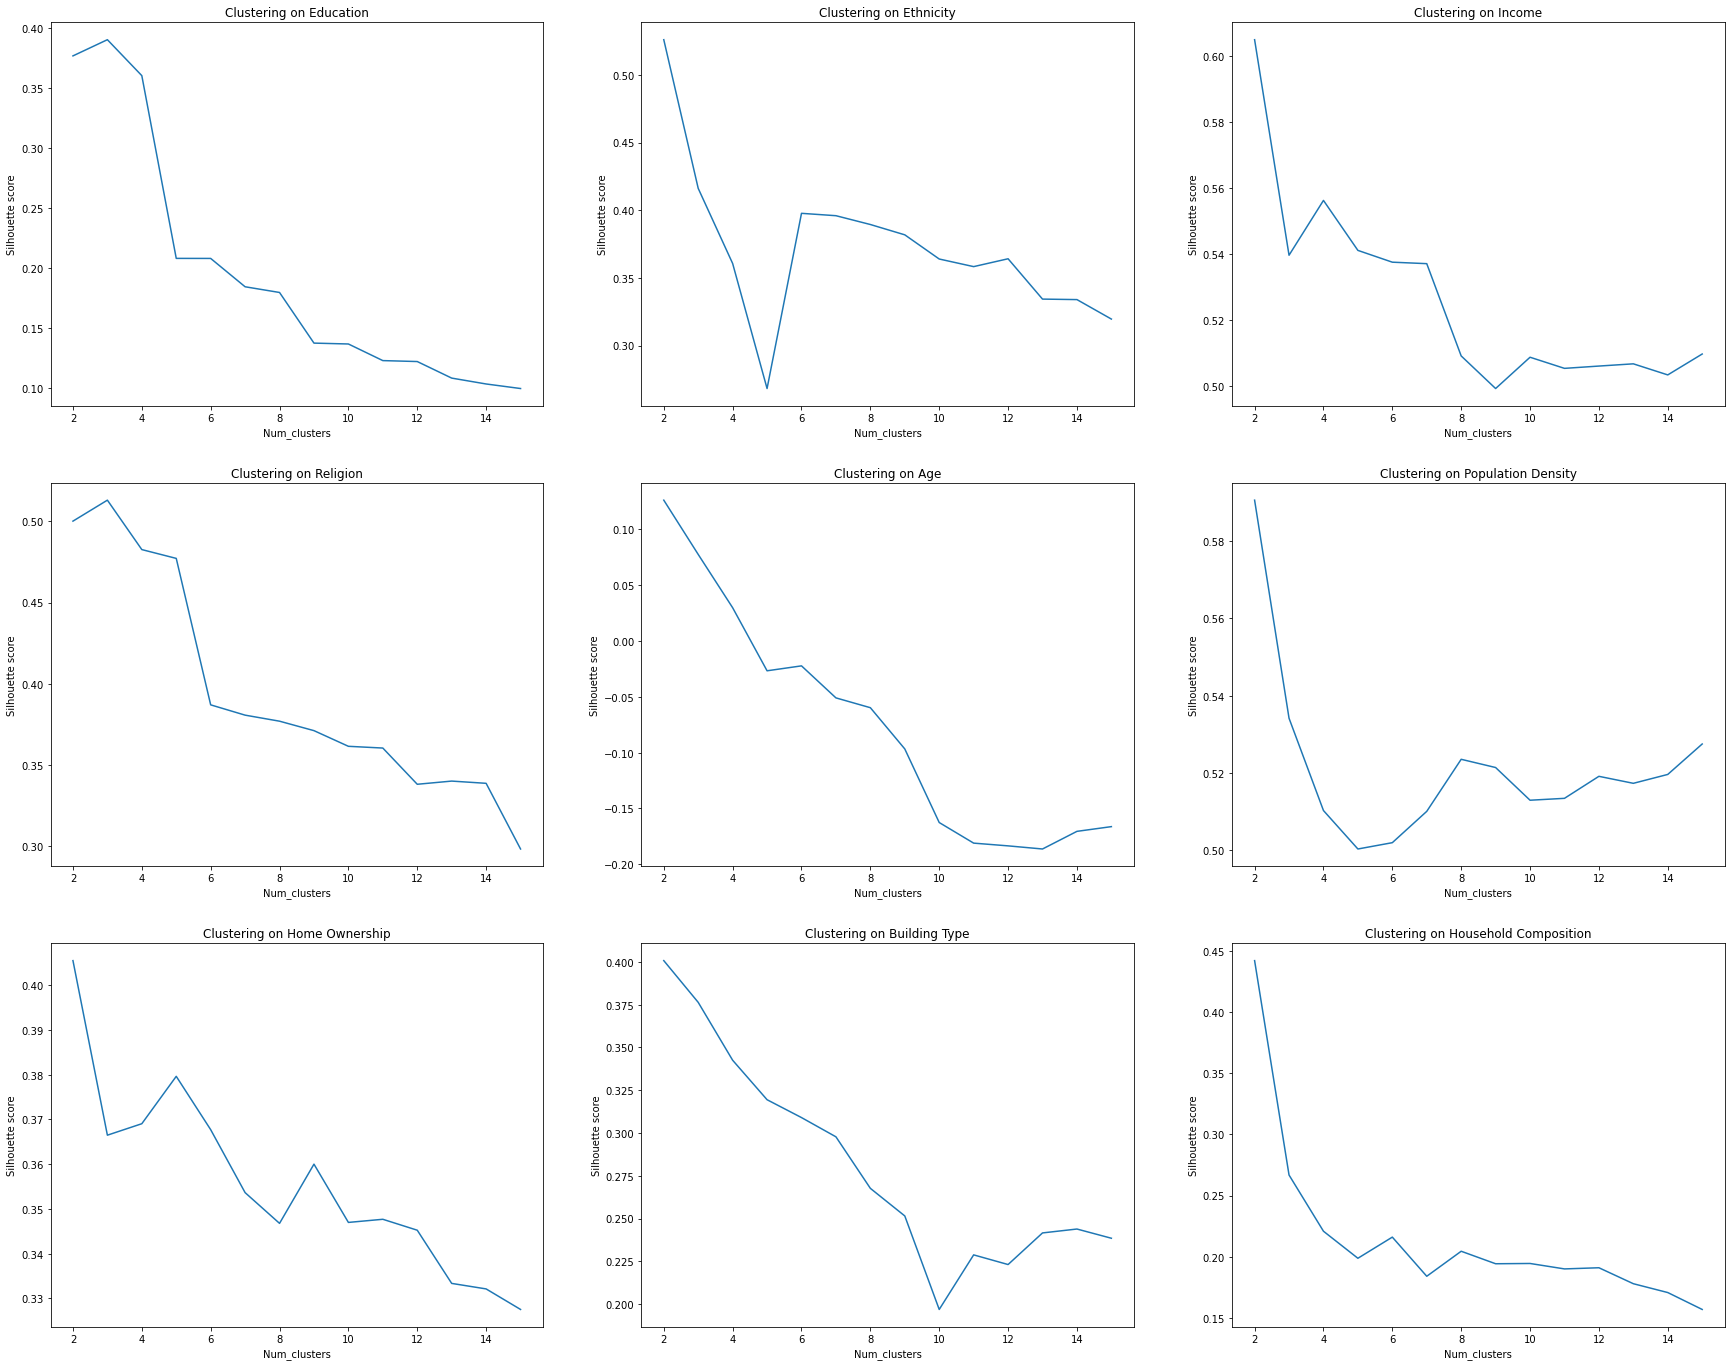

In [175]:
# Removing BAME, as it is the sum over all ethnicity with exception of White
eth_complete = ["perc_ethnicity_white_2011","perc_ethnicity_mixed_2011","perc_ethnicity_asian_2011","perc_ethnicity_black_2011","perc_ethnicity_other_2011"]

fig, axes = plt.subplots(3,3, figsize = (30,24))

axes = axes.flatten()
(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = axes

attributes = [education, eth_complete, "annual_median_income_2011", religions, age, "population_density_2012", dwelling, ownership, household_composition]


# Could have been done easier, but we do it with style
for attr, ax in zip(attributes,axes): 
    
    msoa_cluster = msoa_social[attr]
    silhouettes = []

    for k in range(2, 16):
        # Cluster the data and assigne the labels


        if not isinstance(msoa_cluster, pd.DataFrame):
            labels = AgglomerativeClustering(n_clusters = k).fit_predict(msoa_cluster.values.reshape(-1,1))
            score = silhouette_score(msoa_cluster.values.reshape(-1,1), labels)
            
        else: 
            labels = AgglomerativeClustering(n_clusters = k, affinity = "cosine", linkage = "average").fit_predict(msoa_cluster)
            score = silhouette_score(msoa_cluster, labels)   

        silhouettes.append({"k": k, "score": score})
        

    # Convert to dataframe
    silhouettes = pd.DataFrame(silhouettes)    
    ax.plot(silhouettes.k, silhouettes.score)
    ax.set_xlabel("Num_clusters")
    ax.set_ylabel("Silhouette score")

# Change Labels

ax1.set_title("Clustering on Education")

ax2.set_title("Clustering on Ethnicity")

ax3.set_title("Clustering on Income")

ax4.set_title("Clustering on Religion")

ax5.set_title("Clustering on Age")

ax6.set_title("Clustering on Population Density")

ax7.set_title("Clustering on Home Ownership")

ax8.set_title("Clustering on Building Type")

ax9.set_title("Clustering on Household Composition")

plt.show()

We choose as Clusternumbers generally the highest peak after the initial 2 Group Split, as in many instances and based on the general distribution of features such as wealth or Ethnicity, in many instances two basic groupings would be succesful, i.e rich and poor, White and BAME. However these simple big stick groupings are somewhat less informative and thus we choose the former mentioned approach and try to address effects by this selection later on. 

In [23]:
msoa_cluster_pdt = msoa_social["population_density_2012"].values.reshape(-1,1)
msoa_cluster_bul = msoa_social[dwelling]
msoa_cluster_own = msoa_social[ownership]


agg_clustering = AgglomerativeClustering(n_clusters = 6, affinity = "cosine", linkage = "average").fit(msoa_social[eth_complete])
msoa_social["Cluster_ethn"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = "average").fit(msoa_social[education])
msoa_social["Cluster_edu"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 4).fit(msoa_social["annual_median_income_2011"].values.reshape(-1,1))
msoa_social["Cluster_inc"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = "average").fit(msoa_social[religions])
msoa_social["Cluster_rel"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "average").fit(msoa_social[ownership])
msoa_social["Cluster_own"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "average").fit(msoa_social["population_density_2012"].values.reshape(-1,1))
msoa_social["Cluster_pdt"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 5, affinity = "cosine", linkage = "average").fit(msoa_social[dwelling])
msoa_social["Cluster_bul"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "average").fit(msoa_social[household_composition])
msoa_social["Cluster_hoc"] = agg_clustering.labels_

### Giving the Child a Name

For the education clustering, we can observe for the 3 Cluster that:

- Cluster 0 represent the highly educated middle and upper class, located in and around the Metropolitan Center of London and the Gentrified Areas in western London
- Cluster 1 represent students living in and around the different Campi inside and around London
- Cluster 2 represent the rest of the population in regard to lower to middle class inhabitants with a wider distribution of qualifications per-area

We rename these groupings those into Educated, Students and DAWSD

In [24]:
msoa_social[education + ["Cluster_edu"]].groupby(by = "Cluster_edu").median().head(10)

qualification_no_qualification_2011  qualification_level_1_2011  \
Cluster_edu                                                                    
0                                            811                         492   
1                                           1028                         638   
2                                           1355                         840   

             qualification_level_2_2011  qualification_apprenticeship_2011  \
Cluster_edu                                                                  
0                                   614                                 70   
1                                   625                                 67   
2                                   889                                119   

             qualification_level_3_2011  qualification_level_4_2011  \
Cluster_edu                                                           
0                                   662                        3333   
1                                  1590                        2248   
2                                   679                        1832   

             qualification_other_qualifications_2011  \
Cluster_edu                                            
0                                                601   
1                                                698   
2                                                629   

             qualification_students_2011  
Cluster_edu                               
0                                    477  
1                                   2479  
2                                    456

In [25]:
new_names_edu = {0:"Academic Degree", 1:"Students", 2:"Secondary School"}

msoa_social["Education"] = msoa_social["Cluster_edu"].apply(lambda x: new_names_edu[x])
msoa_social["Education"] = pd.Categorical(msoa_social["Education"], categories=["Academic Degree", "Students", "Secondary School"])

For the ethnicity clustering, we can observe for the 6 Cluster that:

- Cluster 0 represents areas with a small white majority and a strong asian minority
- Cluster 1 represents areas with a asian majority
- Cluster 2 represents areas with a black majority and also a significant white minority
- Cluster 3 represents areas with an equal represenatation of the three largests groups, white, asian and black. 
- Cluster 4 represents areas with a small white majority and a strong black minority
- Cluster 5 represents areas with a strong white majoirty

We rename these groupings those into Educated, Students and DAWSD

In [26]:
msoa_social[eth_complete + ["Cluster_ethn"]].groupby(by = "Cluster_ethn").median().head(10)

perc_ethnicity_white_2011  perc_ethnicity_mixed_2011  \
Cluster_ethn                                                         
0                                  51.6                        4.7   
1                                  27.8                        3.6   
2                                  37.1                        7.0   
3                                  31.9                        5.8   
4                                  51.8                        6.9   
5                                  75.4                        4.5   

              perc_ethnicity_asian_2011  perc_ethnicity_black_2011  \
Cluster_ethn                                                         
0                                 29.00                       9.80   
1                                 53.40                       9.85   
2                                 10.20                      41.30   
3                                 32.75                      24.85   
4                                 10.50                      24.90   
5                                  9.70                       5.70   

              perc_ethnicity_other_2011  
Cluster_ethn                             
0                                  3.30  
1                                  3.55  
2                                  4.10  
3                                  3.50  
4                                  3.20  
5                                  2.00

In [27]:
new_names_ethn = {0:"Strong Asian Minority", 1:"Asian Majority", 2:"Black Majority", 3:"Ethnically Diverse", 4: "Strong Black Minority", 5: "White Majority"}

msoa_social["Ethnicity"] = msoa_social["Cluster_ethn"].apply(lambda x: new_names_ethn[x])
msoa_social["Ethnicity"] = pd.Categorical(msoa_social["Ethnicity"], categories=["Strong Asian Minority", "Asian Majority", "Black Majority", "Ethnically Diverse", "Strong Black Minority", "White Majority"])

For the education clustering, we can observe for the 3 Cluster that:

- Cluster 0 represents area with a strong christian presents and also a high number of people without a declared religion. 
- Cluster 1 represents areas with a strong hindu presents
- Cluster 2 represents areas with a strong muslim presents, combined with information about ethnicity, we can see that these areas are likely high in population from Pakistan and Bagladesh. 

We rename these groupings those into Educated, Students and DAWSD

In [28]:
msoa_social[religions + ["Cluster_rel"]].groupby(by = "Cluster_rel").median()

perc_religion_christian_2011  perc_religion_buddhist_2011  \
Cluster_rel                                                              
0                                    51.9                          0.9   
1                                    28.8                          1.3   
2                                    25.2                          0.7   

             perc_religion_hindu_2011  perc_religion_jewish_2011  \
Cluster_rel                                                        
0                                 2.2                        0.4   
1                                40.2                        0.5   
2                                11.3                        0.2   

             perc_religion_muslim_2011  perc_religion_sikh_2011  \
Cluster_rel                                                       
0                                  8.4                      0.4   
1                                 13.1                      0.6   
2                                 36.6                      4.4   

             perc_religion_other_religion_2011  perc_religion_no_religion_2011  
Cluster_rel                                                                     
0                                          0.5                            22.3  
1                                          2.2                             4.5  
2                                          0.4                             6.9

In [29]:
new_names_rel = {0:"Christian Majority", 1:"Hindu Majority", 2:"Muslim Majority"}
msoa_social["Religion"] = msoa_social["Cluster_rel"].apply(lambda x: new_names_rel[x])
msoa_social["Religion"] = pd.Categorical(msoa_social["Religion"], categories=["Christian Majority", "Hindu Majority", "Muslim Majority"])

For the education clustering, we can observe for the 4 Cluster that:

- Cluster 0 represents the areas with the lowest median income.
- Cluster 1 represents the areas with the highest median income.
- Cluster 2 represents the areas with a low to medium median income.
- Cluster 2 represents the areas with a medium to high median income.

We rename these groupings those into Educated, Students and DAWSD

In [30]:
msoa_social[["annual_median_income_2011"] + ["Cluster_inc"]].groupby(by = "Cluster_inc").median().head(10)

annual_median_income_2011
Cluster_inc                           
0                              27814.0
1                              60656.0
2                              39300.5
3                              48827.5

In [31]:
new_names_inc = {0:"Working Class", 1:"Upper Class", 2:"Lower Middle Class", 3:"Upper Middle Class"}
msoa_social["Income"] = msoa_social["Cluster_inc"].apply(lambda x: new_names_inc[x])
msoa_social["Income"] = pd.Categorical(msoa_social["Income"], categories=["Working Class", "Upper Class", "Lower Middle Class", "Upper Middle Class"])

#### Some more intersting Clusters we checked out, however we will focus from now on on the ones from above

In [32]:
msoa_social[ownership + ["Cluster_own"]].groupby(by = "Cluster_own").median()

perc_tenure_Owned_outright__2011  \
Cluster_own                                     
0                                        26.2   
1                                        10.6   

             perc_tenure_Owned_with_a_mortgage_or_loan__2011  \
Cluster_own                                                    
0                                                       32.4   
1                                                       17.1   

             perc_tenure_Social_rented__2011  perc_tenure_Private_rented__2011  
Cluster_own                                                                     
0                                      12.80                             25.30  
1                                      41.05                             22.45

In [33]:
msoa_social[dwelling + ["Cluster_bul"]].groupby(by = "Cluster_bul").median().head(10)

perc_dwelling_Detached__2011  perc_dwelling_Semi-detached__2011  \
Cluster_bul                                                                    
0                                    37.5                              27.35   
1                                     4.7                              20.40   
2                                     5.2                              26.60   
3                                    10.1                              52.20   
4                                     1.9                               5.10   

             perc_dwelling_Terraced_(including_end-terrace)__2011  \
Cluster_bul                                                         
0                                                        10.25      
1                                                        30.00      
2                                                        44.10      
3                                                        15.00      
4                                                        14.10      

             perc_dwelling_Flat,_maisonette_or_apartment__2011  
Cluster_bul                                                     
0                                                         18.4  
1                                                         43.2  
2                                                         24.4  
3                                                         18.7  
4                                                         75.8

In [34]:
msoa_social[["population_density_2012","Cluster_pdt"]].groupby(by = "Cluster_pdt").median().head(10)

population_density_2012
Cluster_pdt                         
0                              73.95
1                             229.20

In [35]:
msoa_social[household_composition +["Cluster_hoc"]].groupby(by = "Cluster_hoc").median().head(10)

household_composition_couple_household_with_dependent_children_perc_2011  \
Cluster_hoc                                                                             
0                                                         18.8                          
1                                                         21.3                          

             household_composition_couple_household_without_dependent_children_perc_2011  \
Cluster_hoc                                                                                
0                                                         19.0                             
1                                                         11.8                             

             household_composition_lone_parent_household_perc_2011  \
Cluster_hoc                                                          
0                                                         12.0       
1                                                         35.2       

             household_composition_one_person_household_perc_2011  \
Cluster_hoc                                                         
0                                                         30.5      
1                                                         18.3      

             household_composition_other_household_types_perc_2011  
Cluster_hoc                                                         
0                                                         18.6      
1                                                         13.5

#### Visualizing the Data based on the Clustering
We can already make a few interesting observations in regard to the interplay of median income and other socio-economic factors.

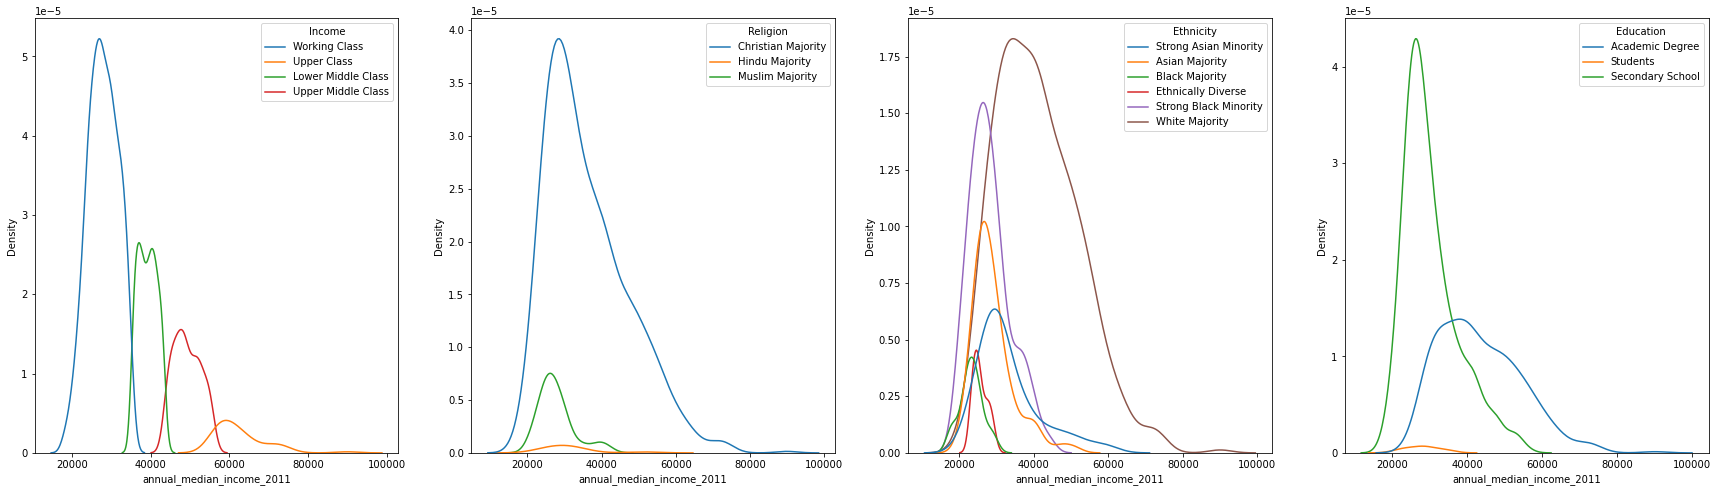

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (30,8))

sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Income", ax = ax1)
sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Religion", ax = ax2)
sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Ethnicity", ax = ax3)
sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Education", ax = ax4)

#### Adding Reverse Dicts, if we need to go back from one representation to the other, but keep consistency

In [37]:
reverse_dict_Ethnicity = {"Strong Black Minority":0, "Asian Majority":1, "Black Majority":2, "Ethnically Diverse":3, "Strong Asian Minority":4, "White Majority":5}
reverse_dict_Income = {"Working Class":0, "Upper Class":1, "Lower Middle Class":2, "Upper Middle Class":3}
reverse_dict_Education = {"Academic Degree":0, "Students":1, "Secondary School":2}
reverse_dict_Religion = {"Christian Majority":0, "Hindu Majority":1, "Muslim Majority":2}

#### Distribution of different ethnicity lables for the MSOA data

In [38]:
fig = make_subplots(rows = 2, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]], vertical_spacing = 0.15)

fig.add_trace(go.Pie(labels = msoa_social.groupby(by = "Income").count().index,
                     values = msoa_social.groupby(by = "Income").count()["name"],
                     marker_colors = ['#f3dee0','#9d0000','#d69495','#ba4a4b'],
                     hole=.3 ,textinfo='label+percent'),1,1)

fig.add_trace(go.Pie(labels = msoa_social.groupby(by = "Ethnicity").count().index,
                     values = msoa_social.groupby(by = "Ethnicity").count()["name"],
                     hole = .3,
                     marker_colors = ['#68d5d9','#009195','#c10a03','#aa755c','#f95312','#e6e6e6'],
                     textinfo = 'label+percent'),1,2)

fig.add_trace(go.Pie(labels = msoa_social.groupby(by = "Religion").count().index,
                     values = msoa_social.groupby(by = "Religion").count()["name
                     hole = .3,
                     marker_colors = ['#f5e4ce', 'be3980', '5f80ca'],
                     textinfo = 'label+percent'),2,1)
                                                                           
fig.add_trace(go.Pie(labels = msoa_social.groupby(by = "Education").count().index,
                     values = msoa_social.groupby(by = "Education").count()["name"],
                     hole = .3,
                     marker_colors = ['#886e9e','#2f0047','#e5e4fd'],
                     textinfo = 'label+percent'),2,2)

fig.update_layout(showlegend = False, height = 750, font = default_font, title = "Distribution of socio-economic Groupings")

print("Writing HTML to Repo...")
path = "../fierceeagle.github.io/_includes/"+"Donuts_Clusters"+".html"
fig.write_html("../fierceeagle.github.io/_includes/"+"Donuts_Clusters"+".html")
plot_map_inline(path)

Writing HTML to Repo...


#### Creating a Sunburst plot showing the different subdivisions of different Groupings 

In [39]:
msoa_social_sunburst = msoa_social.copy()
msoa_social_sunburst["total"] = "Total"
msoa_social_sunburst = msoa_social_sunburst.groupby(by = ["total","Ethnicity", "Education", "Income"]).count().reset_index()
msoa_social_sunburst = msoa_social_sunburst.dropna().rename({"name":"Number of Areas"}, axis = 1)

fig = px.sunburst(msoa_social_sunburst, 
                  path=["total","Ethnicity", "Education", "Income"], 
                  values="Number of Areas",
                  branchvalues="total",
                  color_discrete_sequence = ['#e6e6e6','#f95312','#009195','#68d5d9','#c10a03','#aa755c']) 

fig.update_traces(insidetextorientation='radial', textfont = {'family': 'Franklin Gothic', "size" : 10})
fig.update_layout(title = "Distribution of Subgroupings between Ethnicities", height = 750)

path = "../fierceeagle.github.io/_includes/"+"Sunburst_"+".html"

print("Writing HTML to Repo...")
fig.write_html(path)
plot_map_inline(path)

Writing HTML to Repo...


#### Joining the Dataframes

In [40]:
lsoa_unfiltered_year = lsoa_social.join(lsoa_year, how = "inner")
msoa_unfiltered_year = msoa_social.join(msoa_year, how = "inner")
osward_unfiltered_year = osward_social.join(osward_year, how = "inner")

In [41]:
print("Turning the Data into a pickle ... ")

jar = "pickle_jar" 

msoa_unfiltered_year.to_pickle(path = os.path.join(jar,"msoa_unfiltered_year.pkl"))
lsoa_unfiltered_year.to_pickle(path = os.path.join(jar,"lsoa_unfiltered_year.pkl"))
osward_unfiltered_year.to_pickle(path = os.path.join(jar,"ward_unfiltered_year.pkl"))

print("Funniest shit I have ever seen!")

Turning the Data into a pickle ... 
Funniest shit I have ever seen!


#### Filtering Data based on Representativness for all later analysis
The authors in the paper deemed 0.10 as a good threshold in their analysism, thus we also utilize the same

In [42]:
# Consider only Areas with atleast 10% Representative-ness:

lsoa_combined_year = lsoa_unfiltered_year[lsoa_unfiltered_year.representativeness_norm > 0.10]
msoa_combined_year = msoa_unfiltered_year[msoa_unfiltered_year.representativeness_norm > 0.10]
osward_combined_year = osward_unfiltered_year[osward_unfiltered_year.representativeness_norm > 0.10]

#### Writing Filtered Data into pkl

In [43]:
msoa_combined_year.to_pickle(path = os.path.join(jar,"msoa_filtered_year.pkl"))
lsoa_combined_year.to_pickle(path = os.path.join(jar,"lsoa_filtered_year.pkl"))
osward_combined_year.to_pickle(path = os.path.join(jar,"ward_filtered_year.pkl"))

#### Taking them out of the Jar again

In [44]:
print("Loading pickled Data")
jar = "pickle_jar" 

osward_combined_year = pd.read_pickle(os.path.join(jar,"ward_filtered_year.pkl"))
msoa_combined_year = pd.read_pickle(os.path.join(jar,"msoa_filtered_year.pkl"))
lsoa_combined_year = pd.read_pickle(os.path.join(jar,"lsoa_filtered_year.pkl"))

msoa_unfiltered_year = pd.read_pickle(os.path.join(jar,"msoa_unfiltered_year.pkl"))
lsoa_unfiltered_year = pd.read_pickle(os.path.join(jar,"lsoa_unfiltered_year.pkl"))
osward_unfiltered_year = pd.read_pickle(os.path.join(jar,"ward_unfiltered_year.pkl"))

Loading pickled Data


#### Adding the Clustered Data to the GeoJson
We add the data to the geojson, so that we can use it later on in the hovertemplate of the plotly interactive Geomap plots

In [45]:
for x in msoa_dict["features"]:
    x["properties"]["Income"] = msoa_unfiltered_year["Income"].loc[x["id"]]
    x["properties"]["Education"] = msoa_unfiltered_year["Education"].loc[x["id"]]
    x["properties"]["Ethnicity"] = msoa_unfiltered_year["Ethnicity"].loc[x["id"]]
    x["properties"]["Religion"] = msoa_unfiltered_year["Religion"].loc[x["id"]]
    x["properties"]["Name"] = msoa_unfiltered_year["name"].loc[x["id"]].split("0")[0][:-1]
    x["properties"]["Representativness"] = msoa_unfiltered_year["representativeness_norm"].loc[x["id"]]

### Its about Thyme

For a short look into the data we will look into the caloric consumption based on different nutrients on the ward level during the twelve month measuring period

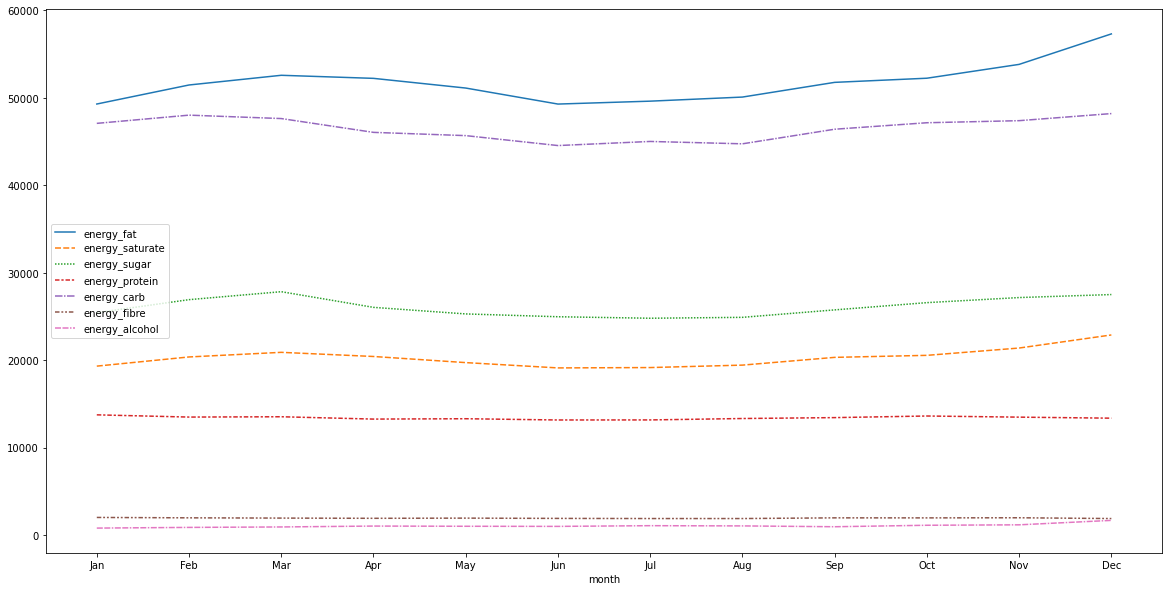

In [153]:
fig, ax = plt.subplots(figsize = (20,10))

g = sns.lineplot(data = osward_months.groupby(by = "month").sum()[nutrients], ax = ax)
plt.show()

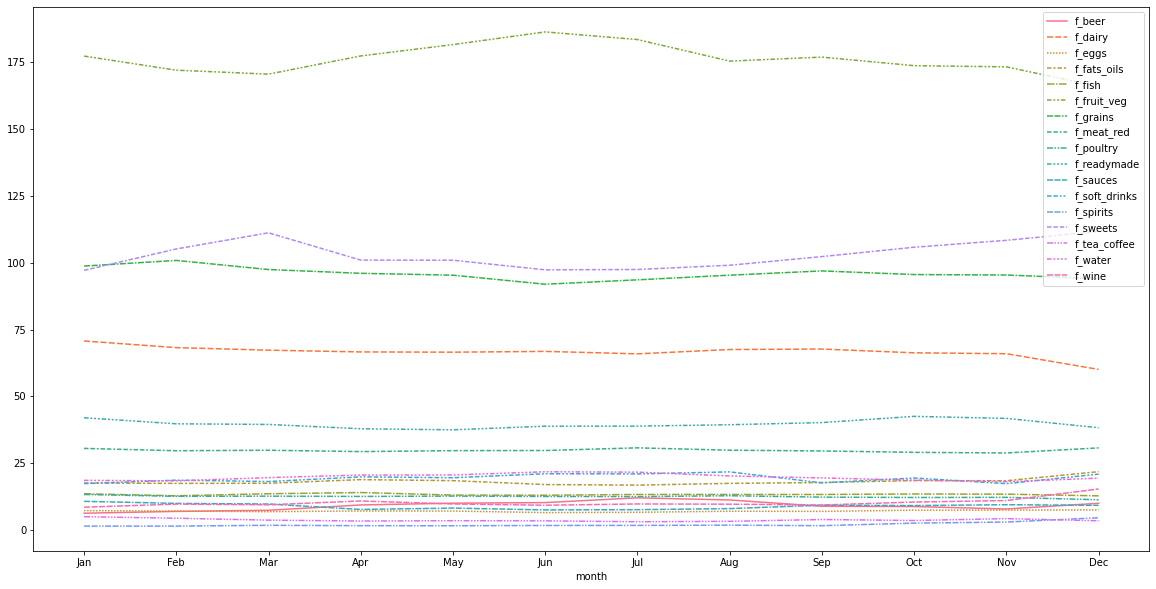

In [154]:
fig, ax = plt.subplots(figsize = (20,10))

g = sns.lineplot(data = osward_months.groupby(by = "month").sum()[products], ax = ax)
plt.show()

In [120]:
histplot = ff.create_distplot([df.population for df in [lsoa_combined_year, msoa_combined_year, osward_combined_year]], ["LSOA","MSOA","Ward"], show_hist=False, show_rug = False)
histplot.update_layout(template = "plotly_white", font = default_font, title = "Population distribution of different area granularities")
histplot.update_xaxes(title = "Population in the Area")
histplot.update_yaxes(title = "Distribution density")
histplot.update_traces(hovertemplate ='Population: ' + '%{x:.2f}' + '<br>' + "" + "Density: %{y:.4f}" + '<extra></extra>')

html = py.plot(histplot, auto_open=False, output_type='div')
path = "./../fierceeagle.github.io/_includes/" + "Population_Distribution" + ".html"
with open(path, 'w') as file:
    file.write(html)

plot_map_inline(path)

#### Checking Data Quality

In [46]:
## Check if any value is Nan
print("There are currently %d rows with nan values in the LSOA dataframe " % lsoa_combined_year[lsoa_combined_year.isna().apply(lambda x : any(x), axis = 1)].shape[0])
print("There are currently %d rows with nan values in the MSOA dataframe " % msoa_combined_year[msoa_combined_year.isna().apply(lambda x : any(x), axis = 1)].shape[0])
print("There are currently %d rows with nan values in the Ward dataframe " % osward_combined_year[osward_combined_year.isna().apply(lambda x : any(x), axis = 1)].shape[0])

There are currently 0 rows with nan values in the LSOA dataframe 
There are currently 0 rows with nan values in the MSOA dataframe 
There are currently 0 rows with nan values in the Ward dataframe 


#### Using LOF to identify outliers based on density

In [47]:
lof_clf = LocalOutlierFactor(n_jobs = -1)
msoa_combined_year["Outlier"] = lof_clf.fit_predict(msoa_combined_year[nutrients_hs]) == -1
msoa_combined_outlier_year = msoa_combined_year[~msoa_combined_year.Outlier]

### Small distribution multiples
Outliers highlighted in the first plot. the second shows the plot with the outliers removed

In [ ]:
g = sns.PairGrid(msoa_combined_year[nutrients_hs + ["Outlier"]], diag_sharey=False, hue = "Outlier", corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

In [ ]:
g = sns.PairGrid(msoa_combined_outlier_year[nutrients_hs], diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

#### Entering the 3D Mind Dojo

In [130]:
three_D_multi_plot_factory(dataframe = msoa_combined_year,
                     x_axis ="annual_median_income_2011" ,
                     y_axis = "perc_ethnicity_white_2011",
                     title = "Interaction between Household Income, Ethnicity and Alcohol Consumption",
                     x_title = "White Inhabitants (%)",
                     y_title = "Area Median Income",
                     z_title = "Kcal by Alcohol in AAP",
                     aggfunc = np.median, 
                     category_z = ["energy_alcohol"],
                     html_name = "3D_Plot_White_Median_Income_Alcohol",
                     output_html = True,
                     auto_commit = False ,
                     quantiles = [0,.125,.25,.375,.5, .625,.75,.875,1],
                     height = 600
                     )

Writing HTML to Repo...
Ave Imperator, morituri te salutant


In [131]:
three_D_multi_plot_factory(
                     dataframe = msoa_combined_year,
                     x_axis  = "annual_median_income_2011" ,
                     y_axis  = "perc_ethnicity_white_2011",
                     title   = "Interaction between Household Income, Ethnicity and Alcoholic Product Consumption",
                     x_title = "White Inhabitants (%)",
                     y_title = "Area Median Income",
                     z_title = "Fraction of product consumption",
                     aggfunc = np.median, 
                     category_z  = ["f_spirits", "f_wine"],
                     html_name   = "3D_Multi_Plot_Spirits_Wine",
                     output_html = True,
                     auto_commit = False,
                     quantiles   = [0,.125,.25,.375,.5, .625,.75,.875,1],
                     height = 600
                     )

Writing HTML to Repo...
Ave Imperator, morituri te salutant


In [132]:
three_D_multi_plot_factory(dataframe = msoa_combined_year,
                     x_axis = "annual_median_income_2011" ,
                     y_axis = "perc_ethnicity_white_2011",
                     title = "Interaction between Household Income, Ethnicity and Alcohol Consumption",
                     x_title = "White Inhabitants (%)",
                     y_title = "Area Median Income",
                     z_title = "Fraction of product consumption",
                     aggfunc = np.median, 
                     category_z = ["f_beer"],
                     html_name = "3D_Plot_Plot_Beer",
                     output_html = True,
                     auto_commit = False ,
                     quantiles = [0,.125,.25,.375,.5, .625,.75,.875,1],
                     height = 600
                     )

Writing HTML to Repo...
Ave Imperator, morituri te salutant


### GeoViz plots
Generation of the final GeoViz Plots, that can be found on the website, the initial data acqusition and merging is performed in independent Notebooks, also found in the repository, as they have package conflict and were only requiered to run once to construct and write the Geojson files needed by the functions.  

<a id='GeoViz'></a>

#### Did you know that many of Londons Landmark, such as Big Ben, the Parliamnet and Buckinham Palace, are located inside the City of Westminster not the City of London?
Bonus Fact: Big Ben is the Clock inside the Elizabeth Tower of the Parliament not the Tower itself

In [ ]:
geo_path = "Geo_Data"

shops =  {"Asda": "#78BE20", "Sainsbury's" : "#ED8B01", "Morrisons":"#00563F", "Tesco":"#00539F"}
scatter_top_four  = pd.read_csv("Geo_Data/top_four_store_locations_greater_london.csv")
scatter_top_four["size"] = 10
scatter_top_four["Store Name"] = scatter_top_four["BusinessName"]

fig = go.Figure()

for key in shops.keys(): 
    
    fig.add_trace(go.Scattermapbox(
            lat = scatter_top_four[scatter_top_four.BusinessName == key].Latitude,
            lon = scatter_top_four[scatter_top_four.BusinessName == key].Longitude,
            hovertext = key,
            mode = 'markers',
            marker = go.scattermapbox.Marker(
                size = 8, 
                opacity = 0.75,
                color = shops[key],
                # symbol = ["commercial" for x in range(scatter_top_four.BusinessName.value_counts()[key])]
            ),
            name = key, 
            text = scatter_top_four[scatter_top_four.BusinessName == key].BusinessName,
        ))

fig.update_layout(margin = {"r":0,"t":25,"l":0,"b":25},
                  height = 800,
                  mapbox = dict(accesstoken="pk.eyJ1IjoiZmllcmNlZWFnbGUiLCJhIjoiY2tpYWN1bzJhMG9hZzJzbW5qbzNvdTFoZSJ9.vUq6HLyFQgs3J4k45aEtZQ",
                      bearing = 0,
                      center = dict(
                            lat = 51.509865,
                            lon = -0.118092
                        ),
                        pitch = 60,
                        zoom = 12))
fig.update_layout(mapbox_style = "mapbox://styles/fierceeagle/ckig4bj0h1hwb19s6yq5n8dkm")
fig.update_layout(legend = dict(
    yanchor = "top",
    y = 0.99,
    xanchor = "right",
    x = 0.99
))

path = "../fierceeagle.github.io/_includes/Store_Locations_London.html"

fig.write_html(path)
github_hook()
plot_map_inline(path)

#### Exploring our Clustering

In [ ]:
template = "%{properties.Name}<br>%{properties.Religion}<br>"

map_plot_factory(msoa_unfiltered_year,
                 geojson = msoa_dict,
                 color_col = 'Religion',
                 zoom = 9,
                 opacity = 0.55,
                 hovertemplate = template,
                 title = "Grouping of Religion on the MSOA Level",
                 labels = {'Grouping of Religion on the MSOA Level'},
                 file_name = "Map_Factory_Religion",
                 data_type = "categorical",
                 height = 800)

In [ ]:
template = "%{properties.Name}<br>%{properties.Income}<br>"

map_plot_factory(msoa_unfiltered_year,
                 geojson = msoa_dict,
                 color_col ='Income',
                 zoom = 9,
                 opacity = 0.55,
                 hovertemplate = template,
                 title = "Grouping of Income on the MSOA Level", 
                 labels = {'Grouping of Income on the MSOA Level'},
                 file_name = "Map_Factory_Income",
                 height = 800)

In [ ]:
template = "%{properties.Name}<br>%{properties.Ethnicity}<br>"

map_plot_factory(msoa_unfiltered_year,
                 geojson = msoa_dict,
                 color_col = 'Ethnicity',
                 zoom = 9,
                 opacity = 0.55,
                 hovertemplate = template,
                 title = "Grouping of Ethnicity on the MSOA Level", 
                 labels = {'Grouping of Ethnicity on the MSOA Level'},
                 file_name = "Map_Factory_Ethnicity",
                 height = 800)

In [ ]:
template = "%{properties.Name}<br>%{properties.Education}<br>"

map_plot_factory(msoa_unfiltered_year,
                 geojson = msoa_dict,
                 color_col = 'Education',
                 zoom = 9.5,
                 opacity = 0.55,
                 hovertemplate = template,
                 title = "Grouping of Education on the MSOA Level", 
                 labels = {'Grouping of Education on the MSOA Level'},
                 file_name = "Map_Factory_Education",
                 height = 800)

In [ ]:
template = "%{properties.Name}<br>Representativness: %{properties.Representativness:.3f}"

map_plot_factory(msoa_unfiltered_year,
                 geojson = msoa_dict,
                 color_col = 'representativeness_norm',
                 zoom = 9,
                 opacity = 0.55,
                 colorbar = dict(title = "Repr."), 
                 hovertemplate = template, 
                 title = "Reprensentativness on the MSOA Level",
                 labels = {'Reprensentativness on the MSOA Level'},
                 file_name = "Map_Factory_Representativness",
                 height = 800)

In [164]:
map_plot_factory(msoa_unfiltered_year,
                 geojson = msoa_dict,
                 color_col = 'f_water',
                 zoom = 9,
                 opacity = 0.55,
                 colorbar = dict(title = ""), 
                 hovertemplate = "<b>%{properties.Name}<b><br>Fraction of consumed Products: %{z:.4f}", 
                 title = "Water consumption on the MSOA Level",
                 labels = {'Water consumption on the MSOA Level'},
                 file_name = "Map_Factory_Water",
                 height = 800)

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Creating IFrame ...


In [133]:
template = "<b>%{properties.Name}</b><br><br>%{properties.Income}<br>%{properties.Education}<br>%{properties.Ethnicity}<br>%{properties.Religion}<br>"

multilayer_map_plot_factory(msoa_unfiltered_year,
                            geojson = msoa_dict,
                            layers = ["Income","Education", "Ethnicity", "Religion"],
                            zoom = 9,
                            opacity = 0.65,
                            hovertemplate = template,
                            highlight_hovertemplate = True,
                            title = "Area Groupings of London Population",
                            hook = True,
                            file_name = "Multilayer_Population_Plot",
                            height = 800)

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Call me Ishmael
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus
Creating IFrame ...


In [ ]:
multilayer_map_plot_factory(msoa_unfiltered_year,
                            geojson = msoa_dict,
                            layers = nutrients,
                            data_type = "continous",
                            zoom = 9,
                            opacity = 0.65,
                            hovertemplate = "Kcal in the AAP: %{z:.2f}",
                            title = "Nutrient Consumption in MSOAs in London",
                            hook = True,
                            file_name = "Multilayer_Nutrient_Plot",
                            height = 800)


In [ ]:
multilayer_map_plot_factory(msoa_unfiltered_year,
                            geojson = msoa_dict,
                            layers = products,
                            data_type = "continous",
                            zoom = 9,
                            opacity = 0.65,
                            hovertemplate = "Relative Occurence: %{z:.4f}",
                            title = "Product Consumption in MSOAs in London",
                            hook = True,
                            file_name = "Multilayer_Product_Plot",
                            height = 800)

## Only Proper ML Following from here on out

#### Correlation Analysis
<a id='Stats'></a>

In [157]:
correlates = ["qualification_no_qualification_2011",
              "qualification_level_1_2011",
              "qualification_level_2_2011",
              "qualification_apprenticeship_2011",
              "qualification_level_3_2011",
              "qualification_level_4_2011",
              "qualification_students_2011",
              "perc_ethnicity_white_2011",
              "perc_ethnicity_mixed_2011",
              "perc_ethnicity_asian_2011",
              "perc_ethnicity_black_2011",
              "perc_ethnicity_bame_2011"]

# Using the Unfiltered Year, so we do not exclude low representativness areas
bar_plot_factory(dataframe = msoa_unfiltered_year,
                 category_socio_economics = ['representativeness_norm'],
                 category_nutrion = correlates,
                 html_name = "Correlation_Representativness_Norm_White",
                 output_html = True,
                 auto_commit = True,
                 height = 600) 

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


### Some Factorio

In [258]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ['perc_ethnicity_white_2011','perc_ethnicity_asian_2011','perc_ethnicity_black_2011'],
                 category_nutrion = nutrients_hs,
                 html_name = "Correlation_Nutirents_Different_Ethnicitites",
                 output_html = True,
                 auto_commit = True,
                 height = 600) 

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [195]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["annual_median_income_2011", "qualification_level_2_2011", "qualification_level_4_2011"],
                 category_nutrion = nutrients_hs,
                 html_name = "Correlation_Nutirents_Income_Eductation_Ethnicitites",
                 output_html = True,
                 auto_commit = True,
                 height = 600)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [256]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["annual_median_income_2011", "qualification_level_2_2011", "qualification_level_4_2011"],
                 category_nutrion = products,
                 html_name = "Correlation_Products_Income_Eductation_Ethnicitites",
                 output_html = True,
                 auto_commit = True,
                 height = 600)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [151]:
correlates = ["qualification_no_qualification_2011",
              "qualification_level_1_2011",
              "qualification_level_2_2011",
              "qualification_apprenticeship_2011",
              "qualification_level_3_2011",
              "qualification_level_4_2011",
              "qualification_students_2011",
              "perc_ethnicity_white_2011",
              "perc_ethnicity_mixed_2011",
              "perc_ethnicity_asian_2011",
              "perc_ethnicity_black_2011",
              "perc_ethnicity_bame_2011"]

bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["f_water"],
                 category_nutrion = correlates + ["annual_median_income_2011"],
                 html_name = "Correlation_Water_Wealth",
                 output_html = True,
                 auto_commit = True,
                 height = 600)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [158]:
correlates = ["qualification_no_qualification_2011",
              "qualification_level_1_2011",
              "qualification_level_2_2011",
              "qualification_apprenticeship_2011",
              "qualification_level_3_2011",
              "qualification_level_4_2011",
              "qualification_students_2011",
              "perc_ethnicity_white_2011",
              "perc_ethnicity_mixed_2011",
              "perc_ethnicity_asian_2011",
              "perc_ethnicity_black_2011",
              "perc_ethnicity_bame_2011"]

bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["annual_median_income_2011"],
                 category_nutrion = correlates,
                 html_name = "Correlation_Wealth_Socio",
                 output_html = True,
                 auto_commit = True,
                 height = 600)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [161]:
correlates = ["qualification_no_qualification_2011","qualification_level_1_2011","qualification_level_2_2011","qualification_apprenticeship_2011","qualification_level_3_2011","qualification_students_2011", "perc_ethnicity_white_2011","perc_ethnicity_mixed_2011","perc_ethnicity_asian_2011","perc_ethnicity_black_2011", "perc_ethnicity_bame_2011"]
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["qualification_level_4_2011"],
                 category_nutrion = correlates + ["annual_median_income_2011"],
                 html_name = "Correlation_Education_Socio",
                 output_html = True,
                 auto_commit = True,
                 height = 600)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [149]:
correlates = ["qualification_no_qualification_2011","qualification_level_1_2011","qualification_level_2_2011","qualification_apprenticeship_2011","qualification_level_3_2011","qualification_level_4_2011","qualification_students_2011", "perc_ethnicity_white_2011","perc_ethnicity_mixed_2011","perc_ethnicity_asian_2011","perc_ethnicity_black_2011", "perc_ethnicity_bame_2011"]
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["f_beer","f_soft_drinks","f_wine"],
                 category_nutrion = correlates + ["annual_median_income_2011"],
                 html_name = "Correlation_Beer_Wealth",
                 output_html = True,
                 auto_commit = True,
                 height = 600)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [259]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ['perc_ethnicity_white_2011','perc_ethnicity_asian_2011','perc_ethnicity_black_2011'],
                 category_nutrion = products,
                 html_name = "Correlation_Prodcuts_Different_Ethnicitites",
                 output_html = True,
                 auto_commit = True,
                 height = 600) 

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [196]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ['perc_ethnicity_white_2011','perc_ethnicity_bame_2011'],
                 category_nutrion = nutrients,
                 html_name = "Correlation_Nutirents_WhiteAndBAME_Ethnicitites",
                 output_html = True,
                 auto_commit = True)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


#### Data Analysis Using Regressors 

Look at the interaction of Product and Nutrient Consumption and their Relationship and Predictive power towards factors, such as High Education, Diversity and Income 

We utilize the previously conducted outlier detection to improve the performance of the model and transform the data using the standard scaler. (Looking at the small multiples, we deem it as suffiecient evidence that the data approximates a normal distribution) 

In [78]:
msoa_regression = msoa_combined_outlier_year 
scaler = StandardScaler()
msoa_combined_outlier_year[nutrients_hs] = scaler.fit_transform(msoa_combined_outlier_year[nutrients_hs])

In [79]:
x_train, x_test, y_train, y_test = train_test_split(msoa_regression[nutrients_hs], msoa_regression["perc_ethnicity_bame_2011"], random_state = 0) 
ols_ethnicity = smf.ols(formula = 'perc_ethnicity_bame_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol + salt + h_nutrients_calories', data = x_train.join(y_train))
res = ols_ethnicity.fit()

# Print thes summary output provided by the library.
print(res.summary())
print("\n\nR2 Score Test:\n", r2_score(y_test, res.predict(x_test)))

                               OLS Regression Results                               
Dep. Variable:     perc_ethnicity_bame_2011   R-squared:                       0.698
Model:                                  OLS   Adj. R-squared:                  0.694
Method:                       Least Squares   F-statistic:                     163.7
Date:                      Fri, 11 Dec 2020   Prob (F-statistic):          3.90e-159
Time:                              20:58:07   Log-Likelihood:                -2429.2
No. Observations:                       646   AIC:                             4878.
Df Residuals:                           636   BIC:                             4923.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [431]:
x_train, x_test, y_train, y_test = train_test_split(msoa_regression[nutrients_hs], msoa_regression["annual_median_income_2011"], random_state = 0) 
ols_income = smf.ols(formula = 'annual_median_income_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol + salt + h_nutrients_calories', data = x_train.join(y_train))
res = ols_income.fit()

# Print thes summary output provided by the library.
print(res.summary())
print("\n\nR2 Score Test:\n", r2_score(y_test, res.predict(x_test)))

                                OLS Regression Results                               
Dep. Variable:     annual_median_income_2011   R-squared:                       0.624
Model:                                   OLS   Adj. R-squared:                  0.618
Method:                        Least Squares   F-statistic:                     117.1
Date:                       Thu, 10 Dec 2020   Prob (F-statistic):          1.02e-128
Time:                               17:11:35   Log-Likelihood:                -6596.9
No. Observations:                        646   AIC:                         1.321e+04
Df Residuals:                            636   BIC:                         1.326e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

#### Ensemble Model Classfiers/Regressors 
<a id='Ensemble'></a>
We consider using Random Forest and Boosting Trees to predict the Labels we derived based on Clustering for Areas in the Greater London Area on the MSOA Level, as the data in these areas presents sufficient representativeness and number of distinct entires. We perform Model Selection for different Hyperparameters of the model using GridSearch and compare different score function to evaluate the model, especially also in regard to responsible data science and the role of label imbalance that can be observed.

#### Preprocessing 

As can be seen through the Donut Diagramms, we can observe that many labels occure only with low probability, thus we consider using Oversampling to increase the number of samples in each class.

#### Model Selection 

To address the issue of Imbalanced Labels and increase the Fairness of the Model in this problem we utilize the balanced_accuracy score to address the imbalanced class label during model selection and as main metric.


<center><img src='https://imgs.xkcd.com/comics/data_pipeline.png'></center>

#### ML Helper Functions, performing Grid Search, CV, Oversampling and Model Evaluation and Plotting

In [71]:
# Performs Girdsearch to find a highly performing DT Classifier, evaluation based on passed scoring and can resample if wanted
def post_pruning_decision_tree_selector(X_data,
                                        y_data,
                                        parameters,
                                        cv = 20,
                                        scoring = "accuracy",
                                        resampler = None):
    
    model = DecisionTreeClassifier()
    
    # Build a Pipeline to only resample the Train Folds
    if resampler == True: 
        model = make_pipeline(RandomOverSampler(random_state = 1), DecisionTreeClassifier())
        parameters = {'decisiontreeclassifier__' + key: parameters[key] for key in parameters}
        
    elif resampler is not None:
        model = make_pipeline(resampler, DecisionTreeClassifier())
        parameters = {'decisiontreeclassifier__' + key: parameters[key] for key in parameters}
        
    gsCV = GridSearchCV(model, parameters, cv = cv, scoring=scoring, n_jobs=-1)
    gsCV.fit(X_data,y_data)
    clf = gsCV.best_estimator_
    print ("Best GridSeach Score: ", gsCV.best_score_, "Best Parameter Combination: ", gsCV.best_params_)
    
    return clf, gsCV.best_score_, gsCV.best_params_


In [72]:
# Performs Girdsearch to find a highly performing RF Classifier, evaluation based on passed scoring and can resample if wanted
def random_forest_Classifier_GS(X_data,
                                y_data,
                                parameters,
                                cv = 20,
                                verbosity = 0,
                                scoring = "accuracy",
                                resampler = None):
    
    model = RandomForestClassifier()
    
    # Build a Pipeline to only resample the Train Folds
    if resampler == True: 
        model = make_pipeline(RandomOverSampler(random_state = 1), RandomForestClassifier())
        parameters = {'randomforestclassifier__' + key: parameters[key] for key in parameters}
        
    elif resampler is not None:
        model = make_pipeline(resampler, RandomForestClassifier())
        parameters = {'randomforestclassifier__' + key: parameters[key] for key in parameters}
    
    gsCV = GridSearchCV(model, parameters, cv = cv, n_jobs=-1, verbose = verbosity, scoring = scoring)
    gsCV.fit(X_data,y_data)
    clf = gsCV.best_estimator_
    print ("Best GridSeach Score: ", gsCV.best_score_, "Best Parameter Combination: ", gsCV.best_params_)
    
    return clf, gsCV.best_score_, gsCV.best_params_


In [73]:
# Performs Girdsearch to find a highly performing BT Classifier, evaluation based on passed scoring and can resample if wanted
def boosting_trees_Classifier_GS(X_data,
                                 y_data,
                                 parameters,
                                 cv = 20,
                                 verbosity = 0,
                                 scoring = "accuracy",
                                 resampler = None):

    model = GradientBoostingClassifier()
    
    # Build a Pipeline to only resample the Train Folds
    if resampler == True: 
        model = make_pipeline(RandomOverSampler(random_state = 1), GradientBoostingClassifier())
        parameters = {'gradientboostingclassifier__' + key: parameters[key] for key in parameters}
        
    elif resampler is not None:
        model = make_pipeline(resampler, GradientBoostingClassifier())
        parameters = {'gradientboostingclassifier__' + key: parameters[key] for key in parameters}
    
    gsCV = GridSearchCV(model,parameters, cv = cv, n_jobs=-1, verbose = verbosity, scoring = scoring)
    gsCV.fit(X_data,y_data)
    clf = gsCV.best_estimator_    
    
    print ("Best GridSeach Score: ", gsCV.best_score_, "Best Parameter Combination: ", gsCV.best_params_)
    
    return clf, gsCV.best_score_, gsCV.best_params_

In [115]:
# Creates Annotated Confusion Matrix Plots and plots them inline as an IFrame
def confusion_matrix_plot_factory(y_true,
                                  y_pred,
                                  html_name = "",
                                  colorscale = "Inferno",
                                  title = "Placeholder Title",
                                  output_html = False,
                                  auto_commit = False,
                                  height = 1000):
    
    fig = make_subplots(rows=1, cols=3, subplot_titles=["Percentage of all Observations", "Prediction Normalized", "Label Normalized"], shared_yaxes = True)

    annotations = []
    
    
    for col, val in enumerate(zip(["all", "pred", "true"], ["Percentage: %{z:.2f}", "Perc. rela. to predicted Labels: %{z:.2f}", "Perc. rela. to true Label: %{z:.2f}"])):
        
        confusion = confusion_matrix(y_true, y_pred, normalize = val[0], labels = y_true.unique())
        
        # Why do it hard, when you can do it smart
        heatmap = ff.create_annotated_heatmap(z = confusion, x = y_true.unique(), y = y_true.unique(), annotation_text  = np.round_(confusion, decimals = 2), showscale = False, hovertemplate = "True Label: %{y}<br>Predicted Label: %{x}<br>"+val[1]+"<extra></extra>", colorscale = colorscale)
        fig.add_trace(heatmap.data[0], row = 1, col = col + 1)
    
        annotation = list(heatmap.layout.annotations)
        
        for k in range(len(annotation)):
            annotation[k]['xref'] = 'x' + str(col + 1)
            annotation[k]['yref'] = 'y' + str(col + 1)
        
        annotations.extend(annotation)
    
    fig.update_xaxes(title_text = "Predicted Label")
    fig.update_yaxes(title_text = "True Label", row = 1, col = 1)
    fig.update_layout(margin_pad = 10,
                      margin = {'r': 25, 'l': 25, 't': 50, 'b': 25},
                      plot_bgcolor = 'rgb(255,255,255)',
                      font = default_font,
                      title = {'text': title,
                               'y':1,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'})

    for anno in annotations:
        fig.add_annotation(anno)
        
    path = "../fierceeagle.github.io/_includes/"+ html_name + ".html"
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        if auto_commit: 
            github_hook()
            
    return plot_map_inline(path)

In [75]:
# Creates a Horizontal Bar Plot for visualizing feature importance and plots them inline as an IFrame
def feature_plot_factory(labels,
                         features,
                         html_name = "",
                         colorscale = "Inferno",
                         title = "Placeholder Title",
                         output_html = False,
                         auto_commit = False):
    
    zipped = sorted(list(zip(labels, features)), key = lambda x: x[1])
    
    fig = go.Figure(go.Bar(
            x=[x[1] for x in zipped],
            y=[label_processor(x[0]) for x in zipped],
            orientation='h',
            marker_color= color_tesco_blue))

    fig.update_xaxes(title_text = "Feature Importance")
    fig.update_yaxes(title_text = "Feature Name")
    fig.update_layout(title = title, template = "plotly_white", margin_pad = 10, margin = {'r': 25, 'l': 25, 't': 50, 'b': 25}, font = default_font)
    
    path = "../fierceeagle.github.io/_includes/"+ html_name + ".html"
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        if auto_commit: 
            github_hook()
            
    return plot_map_inline(path)

In [76]:
## Creates a Tree Plot using the dtreeviz libary, can automatically write the resulting SVG to a file and push the local repo,
#  however need to consider to change the width and height parameter of the svg

def tree_plot_factory(X,
                      y,
                      X_test,
                      y_test,
                      X_cols,
                      y_col,
                      clf,
                      reverse_dict,
                      store_tree = False,
                      path = "./../fierceeagle.github.io/images/",
                      file_name = "place_holder",
                      hook = False,
                      plot_test = True,
                      resampler = RandomOverSampler(random_state = 1)):
    
    y = y.apply(lambda x : reverse_dict[x])
    
    # Fitting the Data, for later visualization
      
    if y_col == "Education":
        class3colors = ['#886e9e', '#2f0047', '#e5e4fd']
    else: # religion
        class3colors = ['#f5e4ce', '#be3980', '#5f80ca']
    
    if plot_test: 
        X , y = resampler.fit_resample(X,y)
        clf.fit(X,y)  
        viz = dtreeviz(clf, X_test, y_test.apply(lambda x : reverse_dict[x]),
                       target_name = y_col,
                       feature_names = [label_processor(x) for x in X_cols],
                       class_names = list(reverse_dict.keys()),
                       colors = {'classes':[ None,  # 0 classes
                                             None,  # 1 class
                                             ['#FEFEBB', '#a1dab4'],  # 2 classes
                                             class3colors,  # RELIGION OR EDUCATION
                                             ['#f3dee0', '#9d0000', '#d69495', '#ba4a4b'],  # INCOME
                                             ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', '#e6e6e6'],  # 5
                                             ['#f95312', '#009195', '#c10a03', '#aa755c', '#68d5d9', '#e6e6e6']]}
            )  
    else:
        X_res , y_res = resampler.fit_resample(X,y)
        clf.fit(X_res,y_res)  
        viz = dtreeviz(clf, X, y,
                       target_name = y_col,
                       feature_names = [label_processor(x) for x in X_cols],
                       class_names = list(reverse_dict.keys()),
                       colors = {'classes':[ None,  # 0 classes
                                             None,  # 1 class
                                             ['#FEFEBB', '#a1dab4'],  # 2 classes
                                             class3colors,  # RELIGION OR EDUCATION
                                             ['#f3dee0', '#9d0000', '#d69495', '#ba4a4b'],  # INCOME
                                             ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', '#e6e6e6'],  # 5
                                             ['#f95312', '#009195', '#c10a03', '#aa755c', '#68d5d9', '#e6e6e6']]}
            ) 
        

    if store_tree:
        print("Storing SVG")
        viz.save(path + file_name + ".svg")
        svg_plot_size_helper(path, file_name)
        
    if hook: 
        github_hook()
        
    return viz

In [77]:
# An aggreating helper function reporting a set of important performance measures for a multiclass classifier
def multilabel_prediction_report(y_true, x_test, predictor):
    print("Weighted F1 Score Result: %.3f " % f1_score(y_true, predictor.predict(x_test), average = "weighted") )
    print("Balanced Accuracy Result: %.3f " % balanced_accuracy_score(y_true, predictor.predict(x_test)))
    print("Accuracy: %.3f" % accuracy_score(y_true, predictor.predict(x_test)))
    print("Classification Report:")
    print(classification_report(y_true, predictor.predict(x_test)))

### Ethnicity

In [87]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Ethnicity"],
                                                    random_state = 0) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 15,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"n_estimators" : [10,25,50,75,100,150],
                                                               "criterion" : ["gini", "entropy"],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]})
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   42.4s finished


Best GridSeach Score:  0.5399995991662659 Best Parameter Combination:  {'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 10}
Weighted F1 Score Result: 0.697 
Balanced Accuracy Result: 0.593 
Accuracy: 0.704
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.69      0.86      0.77        29
       Black Majority       0.25      0.50      0.33         2
   Ethnically Diverse       0.33      0.50      0.40         4
Strong Asian Minority       0.43      0.25      0.32        24
Strong Black Minority       0.63      0.63      0.63        54
       White Majority       0.82      0.82      0.82       103

             accuracy                           0.70       216
            macro avg       0.53      0.59      0.54       216
         weighted avg       0.70      0.70      0.70       216



In [88]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Ethnicity"],
                                                    random_state = 0) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 15,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [10,25,50,75,100,150],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = True)
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished


Best GridSeach Score:  0.5710345518678851 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 75}
Weighted F1 Score Result: 0.705 
Balanced Accuracy Result: 0.605 
Accuracy: 0.708
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.75      0.93      0.83        29
       Black Majority       0.17      0.50      0.25         2
   Ethnically Diverse       0.40      0.50      0.44         4
Strong Asian Minority       0.41      0.29      0.34        24
Strong Black Minority       0.64      0.59      0.62        54
       White Majority       0.82      0.82      0.82       103

             accuracy                           0.71       216
            macro avg       0.53      0.61      0.55       216
         weighted avg       0.71      0.71      0.70       216



In [89]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Ethnicity"],
                                                    random_state = 0) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 cv = 15,
                                                 verbosity = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [10,25,50,75,100,150],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = SMOTE(n_jobs = -1, random_state = 0))
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)
feature_plot_factory(nutrients_hs, clf[1].feature_importances_, html_name = "FeatureImportance_Ethnicity_RandomForest_Nutrients", title = " Feature importance for the RFC on Nutrients and Ethnicity", output_html = True, auto_commit = True)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.7min finished


Best GridSeach Score:  0.5838331729998397 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.705 
Balanced Accuracy Result: 0.602 
Accuracy: 0.694
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.73      0.93      0.82        29
       Black Majority       0.09      0.50      0.15         2
   Ethnically Diverse       0.67      0.50      0.57         4
Strong Asian Minority       0.29      0.29      0.29        24
Strong Black Minority       0.69      0.61      0.65        54
       White Majority       0.86      0.78      0.82       103

             accuracy                           0.69       216
            macro avg       0.55      0.60      0.55       216
         weighted avg       0.73      0.69      0.71       216

Writing HTML to Repo...
Ave Imperator, moritu

In [90]:
confusion_matrix_plot_factory(y_test,
                              clf.predict(x_test),
                              html_name = "Heatmap_Ethnicity_RandomForest_Nutrients",
                              title = " Confusion Matricies for the RFC on Nutrients and Ethnicity",
                              output_html = True,
                              colorscale = "Blues",
                              auto_commit = True)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [91]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year["Ethnicity"],
                                                    random_state = 0) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 cv = 15,
                                                 verbosity = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [10,25,50,75,100,150],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = SMOTE(n_jobs = -1, random_state = 0))
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

feature_plot_factory(products,
                     clf[1].feature_importances_,
                     html_name = "FeatureImportance_Ethnicity_RandomForest_Products",
                     title = " Feature importance for the RFC on Product and Ethnicity",
                     output_html = True,
                     auto_commit = True)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.1min finished


Best GridSeach Score:  0.5838263588263588 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.765 
Balanced Accuracy Result: 0.753 
Accuracy: 0.755
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.81      0.86      0.83        29
       Black Majority       0.14      1.00      0.25         2
   Ethnically Diverse       0.75      0.75      0.75         4
Strong Asian Minority       0.50      0.38      0.43        24
Strong Black Minority       0.71      0.69      0.70        54
       White Majority       0.90      0.84      0.87       103

             accuracy                           0.75       216
            macro avg       0.63      0.75      0.64       216
         weighted avg       0.78      0.75      0.77       216

Writing HTML to Repo...
Ave Imperat

In [92]:
confusion_matrix_plot_factory(y_test,
                              clf.predict(x_test),
                              html_name = "Heatmap_Ethnicity_RandomForest_Products",
                              title = " Confusion Matricies for the RFC on Product and Ethnicity",
                              output_html = True,
                              colorscale = "Blues",
                              auto_commit = True)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


#### Education

In [93]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Education"],
                                                    random_state = 0,
                                                    stratify =  msoa_combined_outlier_year["Education"])

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]})
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   22.3s finished


Best GridSeach Score:  0.5830272536687632 Best Parameter Combination:  {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 150}
Weighted F1 Score Result: 0.866 
Balanced Accuracy Result: 0.584 
Accuracy: 0.870
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.84      0.86      0.85        88
Secondary School       0.89      0.89      0.89       126
        Students       0.00      0.00      0.00         2

        accuracy                           0.87       216
       macro avg       0.58      0.58      0.58       216
    weighted avg       0.86      0.87      0.87       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [94]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Education"],
                                                    random_state = 0,
                                                    stratify =  msoa_combined_outlier_year["Education"])

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = True)
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   27.8s finished


Best GridSeach Score:  0.585979035639413 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.876 
Balanced Accuracy Result: 0.591 
Accuracy: 0.880
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.86      0.88      0.87        88
Secondary School       0.90      0.90      0.90       126
        Students       0.00      0.00      0.00         2

        accuracy                           0.88       216
       macro avg       0.58      0.59      0.59       216
    weighted avg       0.87      0.88      0.88       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Fitting 5 folds for each of 36 candidates, totalling 180 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.5s finished


Best GridSeach Score:  nan Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 50}
Weighted F1 Score Result: 0.840 
Balanced Accuracy Result: 0.561 
Accuracy: 0.833
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.80      0.84      0.82        88
Secondary School       0.89      0.84      0.87       126
        Students       0.00      0.00      0.00         2

        accuracy                           0.83       216
       macro avg       0.57      0.56      0.56       216
    weighted avg       0.85      0.83      0.84       216



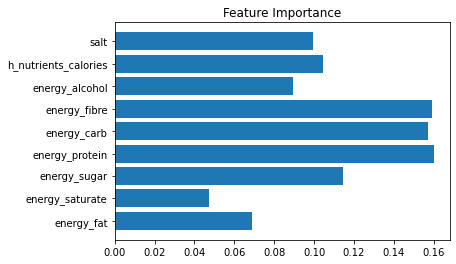

In [95]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Education"],
                                                    random_state = 0,
                                                    stratify =  msoa_combined_outlier_year["Education"])

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = ADASYN(n_jobs = -1, random_state = 0))

multilabel_prediction_report(y_test, x_test, clf)
plt.barh(nutrients_hs, clf[1].feature_importances_)
plt.gca().set_title("Feature Importance")
plt.show()

### Religion

In [105]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Religion"],
                                                    random_state = 0,
                                                    stratify = msoa_combined_outlier_year["Religion"])

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]})
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   24.4s finished


Best GridSeach Score:  0.5559437047572641 Best Parameter Combination:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'n_estimators': 150}
Weighted F1 Score Result: 0.928 
Balanced Accuracy Result: 0.688 
Accuracy: 0.935
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.95      0.98      0.96       196
    Hindu Majority       1.00      0.67      0.80         3
   Muslim Majority       0.70      0.41      0.52        17

          accuracy                           0.94       216
         macro avg       0.88      0.69      0.76       216
      weighted avg       0.93      0.94      0.93       216



In [106]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Religion"],
                                                    random_state = 0,
                                                    stratify = msoa_combined_outlier_year["Religion"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = True)
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   27.2s finished


Best GridSeach Score:  0.6240859705266485 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 200}
Weighted F1 Score Result: 0.917 
Balanced Accuracy Result: 0.792 
Accuracy: 0.921
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.95      0.96      0.96       196
    Hindu Majority       0.75      1.00      0.86         3
   Muslim Majority       0.54      0.41      0.47        17

          accuracy                           0.92       216
         macro avg       0.75      0.79      0.76       216
      weighted avg       0.91      0.92      0.92       216



In [107]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Religion"],
                                                    random_state = 0, stratify = msoa_combined_outlier_year["Religion"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = SMOTE(n_jobs = -1, random_state = 0))
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)
feature_plot_factory(nutrients_hs,
                     clf[1].feature_importances_,
                     html_name = "FeatureImportance_Religion_RandomForest_Nutrients",
                     title = " Feature importance for the RFC on Nutrients and Religion",
                     output_html = True,
                     auto_commit = True)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   39.2s finished


Best GridSeach Score:  0.656642303082981 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 50}
Weighted F1 Score Result: 0.908 
Balanced Accuracy Result: 0.821 
Accuracy: 0.903
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.96      0.93      0.95       196
    Hindu Majority       0.38      1.00      0.55         3
   Muslim Majority       0.50      0.53      0.51        17

          accuracy                           0.90       216
         macro avg       0.61      0.82      0.67       216
      weighted avg       0.92      0.90      0.91       216

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   46.9s finished


Best GridSeach Score:  0.7211185299320892 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 75}
Weighted F1 Score Result: 0.927 
Balanced Accuracy Result: 0.847 
Accuracy: 0.926
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.96      0.95      0.96       196
    Hindu Majority       0.60      1.00      0.75         3
   Muslim Majority       0.59      0.59      0.59        17

          accuracy                           0.93       216
         macro avg       0.72      0.85      0.77       216
      weighted avg       0.93      0.93      0.93       216



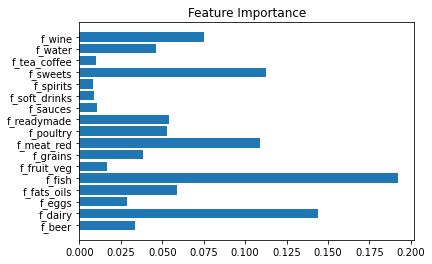

In [108]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year["Religion"],
                                                    random_state = 0,
                                                    stratify = msoa_combined_outlier_year["Religion"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 cv = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = SMOTE(n_jobs = -1,random_state = 0))
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)
plt.barh(products, clf[1].feature_importances_)
plt.gca().set_title("Feature Importance")
plt.show()

### Income

In [109]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Income"],
                                                    random_state = 0,
                                                    stratify =  msoa_combined_outlier_year["Income"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]})
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.1min finished


Best GridSeach Score:  0.5230116959064327 Best Parameter Combination:  {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 75}
Weighted F1 Score Result: 0.627 
Balanced Accuracy Result: 0.478 
Accuracy: 0.648
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.38      0.34      0.36        44
       Upper Class       0.42      0.45      0.43        11
Upper Middle Class       0.42      0.24      0.30        34
     Working Class       0.77      0.88      0.82       127

          accuracy                           0.65       216
         macro avg       0.50      0.48      0.48       216
      weighted avg       0.62      0.65      0.63       216



In [110]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Income"],
                                                    random_state = 0,
                                                    stratify =  msoa_combined_outlier_year["Income"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = True)
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.7min finished


Best GridSeach Score:  0.564234544695071 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 250}
Weighted F1 Score Result: 0.647 
Balanced Accuracy Result: 0.504 
Accuracy: 0.653
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.40      0.39      0.39        44
       Upper Class       0.42      0.45      0.43        11
Upper Middle Class       0.38      0.32      0.35        34
     Working Class       0.82      0.85      0.83       127

          accuracy                           0.65       216
         macro avg       0.50      0.50      0.50       216
      weighted avg       0.64      0.65      0.65       216



Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.5min finished


Best GridSeach Score:  0.55703216374269 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 250}
Weighted F1 Score Result: 0.645 
Balanced Accuracy Result: 0.543 
Accuracy: 0.634
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.37      0.45      0.41        44
       Upper Class       0.39      0.64      0.48        11
Upper Middle Class       0.33      0.29      0.31        34
     Working Class       0.88      0.79      0.83       127

          accuracy                           0.63       216
         macro avg       0.49      0.54      0.51       216
      weighted avg       0.66      0.63      0.64       216



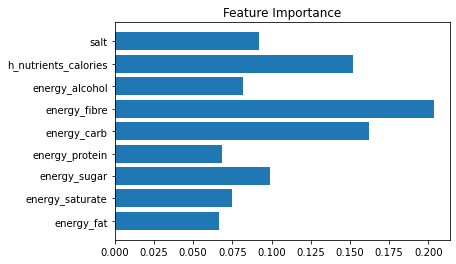

In [111]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year["Income"],
                                                    random_state = 0,
                                                    stratify =  msoa_combined_outlier_year["Income"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = SMOTE(n_jobs = -1, random_state = 0))
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)
plt.barh(nutrients_hs, clf[1].feature_importances_)
plt.gca().set_title("Feature Importance")
plt.show()

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.1min finished


Best GridSeach Score:  0.5663868003341687 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 150}
Weighted F1 Score Result: 0.670 
Balanced Accuracy Result: 0.574 
Accuracy: 0.671
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.35      0.32      0.33        44
       Upper Class       0.50      0.64      0.56        11
Upper Middle Class       0.47      0.50      0.49        34
     Working Class       0.85      0.84      0.85       127

          accuracy                           0.67       216
         macro avg       0.54      0.57      0.56       216
      weighted avg       0.67      0.67      0.67       216



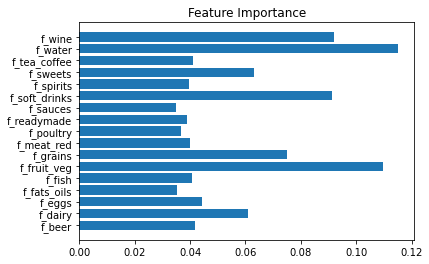

In [112]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year["Income"],
                                                    random_state = 0,
                                                    stratify = msoa_combined_outlier_year["Income"]) 

clf, score, params = random_forest_Classifier_GS(x_train,
                                                 y_train,
                                                 verbosity = 5,
                                                 scoring = "balanced_accuracy",
                                                 parameters = {"criterion" : ["gini", "entropy"],
                                                               "n_estimators" : [50,75,100,150,200,250],
                                                               "class_weight" : [None, "balanced", "balanced_subsample"]},
                                                 resampler = SMOTE(n_jobs = -1, random_state = 0))
clf.fit(x_train, y_train)
multilabel_prediction_report(y_test, x_test, clf)
plt.barh(products, clf[1].feature_importances_)
plt.gca().set_title("Feature Importance")
plt.show()

![Trees](https://imgs.xkcd.com/comics/tree.png)

## "Explainable" Decision Tree Model 
<a id='>DecisionTree'></a>
Try to train a model that can provide good performance on a testing set and additonally an understandable decision tree, at least on a higher level understanding. 

#### Predicting Ethnicity based on Nutrient consumption

Best GridSeach Score:  0.5430044492544494 Best Parameter Combination:  {'decisiontreeclassifier__ccp_alpha': 0.0075, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 8}
Weighted F1 Score Result: 0.640 
Balanced Accuracy Result: 0.554 
Accuracy: 0.625
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.65      0.90      0.75        29
       Black Majority       0.07      0.50      0.12         2
   Ethnically Diverse       0.20      0.50      0.29         4
Strong Asian Minority       0.25      0.21      0.23        24
Strong Black Minority       0.68      0.50      0.57        54
       White Majority       0.81      0.72      0.76       103

             accuracy                           0.62       216
            macro avg       0.44      0.55      0.45       216
         weighted avg 

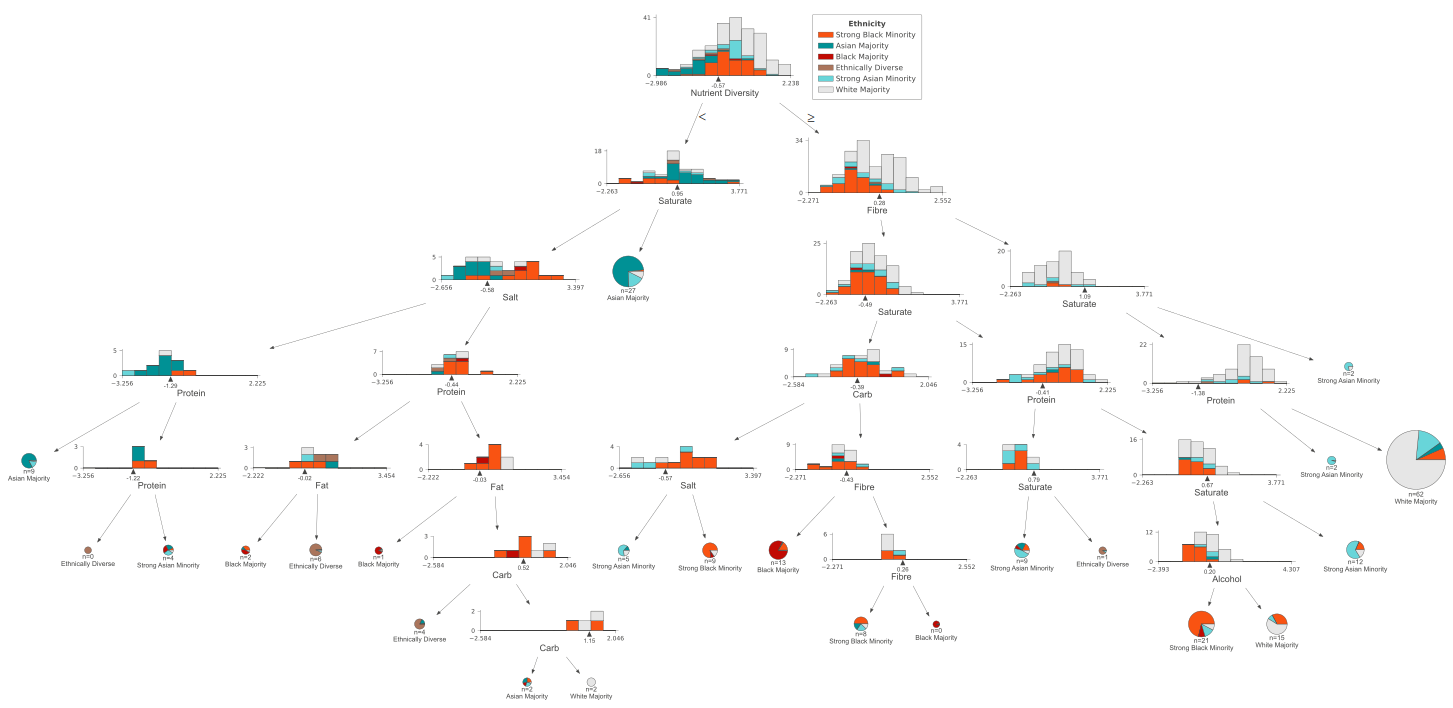

In [113]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year['Ethnicity'],
                                                    random_state = 0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 12,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      'ccp_alpha' : np.arange(0, 0.01, 0.0005),
                                                                      "max_features" : ["log2", "sqrt", None],
                                                                      "class_weight" : [None, "balanced"],
                                                                      "min_samples_split" : np.arange(4,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, nutrients_hs, "Ethnicity", clf[1], reverse_dict_Ethnicity)

#### Predicting Ethnicity based on Product consumption

Best GridSeach Score:  0.5145121853455188 Best Parameter Combination:  {'decisiontreeclassifier__ccp_alpha': 0.0075, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 16, 'decisiontreeclassifier__random_state': 1}
Weighted F1 Score Result: 0.557 
Balanced Accuracy Result: 0.543 
Accuracy: 0.537
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.40      0.69      0.51        29
       Black Majority       0.07      1.00      0.13         2
   Ethnically Diverse       0.17      0.50      0.25         4
Strong Asian Minority       0.11      0.04      0.06        24
Strong Black Minority       0.48      0.30      0.37        54
       White Majority       0.90      0.73      0.81       103

             accuracy                           0.54       216
            macro avg       0.36      0.5

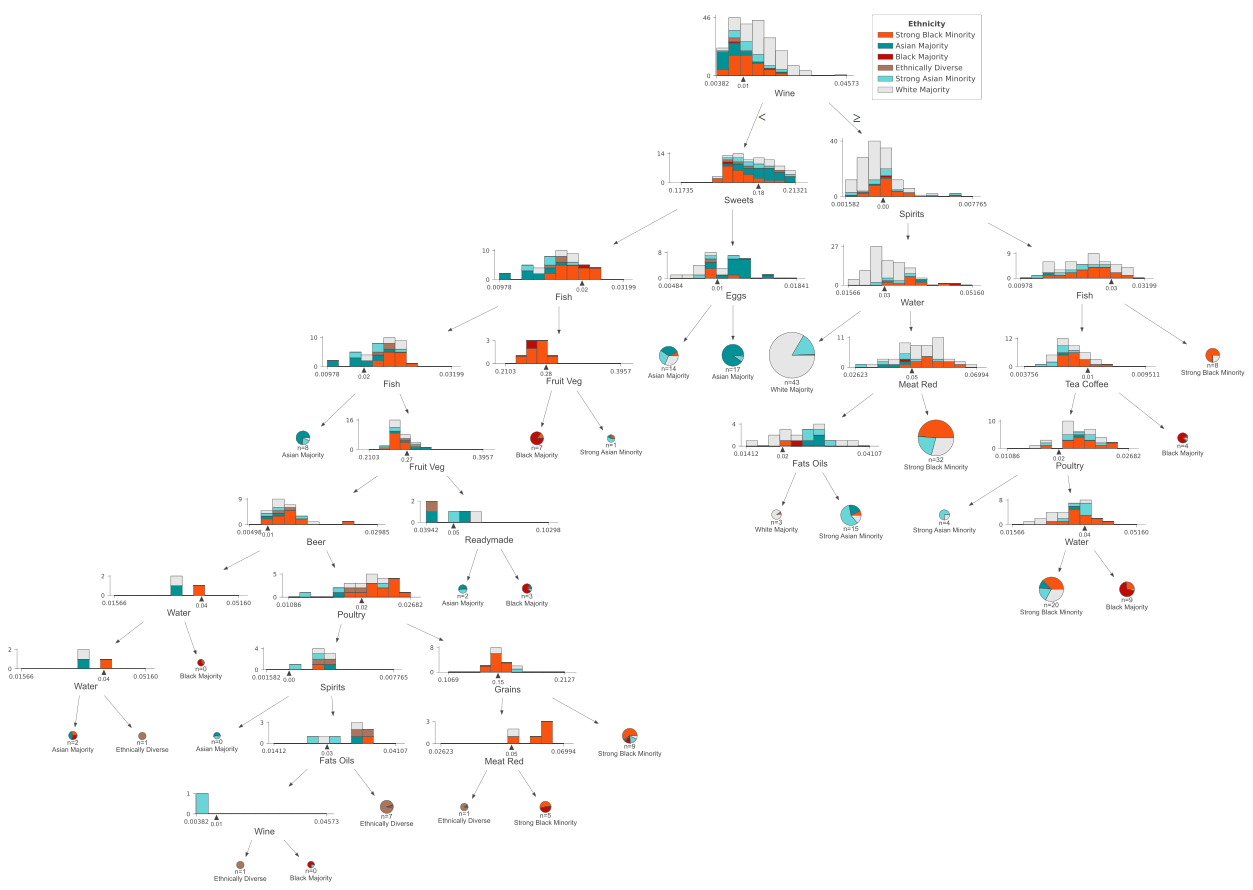

In [177]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year['Ethnicity'],
                                                    random_state = 0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 12,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha':np.arange(0, 0.01, 0.0005),
                                                                      "max_features": ["log2", "sqrt", None],
                                                                      "class_weight" : [None, "balanced"],
                                                                      "min_samples_split" :np.arange(4,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree

tree_plot_factory(train_x,
                  train_y,
                  test_x,
                  test_y,
                  products,
                  "Ethnicity",
                  clf[1],
                  reverse_dict_Ethnicity,
                  store_tree = True,
                  file_name = "Ethnicity_Product_dt",
                  hook = True)


#### Predicting Income based on Nutrient consumption

Best GridSeach Score:  0.572548036758563 Best Parameter Combination:  {'decisiontreeclassifier__ccp_alpha': 0.0085, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_split': 4, 'decisiontreeclassifier__random_state': 1}
Weighted F1 Score Result: 0.621 
Balanced Accuracy Result: 0.458 
Accuracy: 0.583
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.29      0.41      0.34        37
       Upper Class       0.25      0.23      0.24        13
Upper Middle Class       0.29      0.52      0.37        31
     Working Class       0.95      0.68      0.79       135

          accuracy                           0.58       216
         macro avg       0.44      0.46      0.44       216
      weighted avg       0.70      0.58      0.62       216



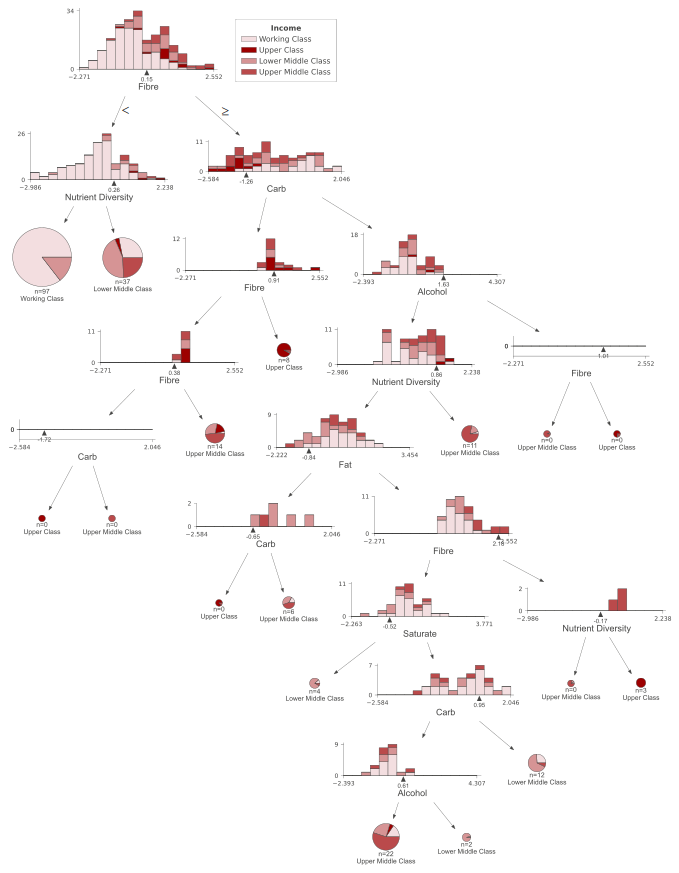

In [436]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year['Income'],
                                                    random_state=0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 20,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha':np.arange(0, 0.01, 0.0005),
                                                                      "max_features": ["log2", "sqrt", None],
                                                                      "class_weight" : [None, "balanced"],
                                                                      "min_samples_split" :np.arange(4,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, nutrients_hs, "Income", clf[1], reverse_dict_Income)

#### Predicting Income based on Product consumption

Best GridSeach Score:  0.4943755221386801 Best Parameter Combination:  {'decisiontreeclassifier__ccp_alpha': 0.0085, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_split': 4, 'decisiontreeclassifier__random_state': 1}
Weighted F1 Score Result: 0.694 
Balanced Accuracy Result: 0.619 
Accuracy: 0.671
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.35      0.51      0.41        37
       Upper Class       0.44      0.62      0.52        13
Upper Middle Class       0.54      0.61      0.58        31
     Working Class       0.92      0.73      0.81       135

          accuracy                           0.67       216
         macro avg       0.56      0.62      0.58       216
      weighted avg       0.74      0.67      0.69       216

Storing SVG
Opening File
Accessing Object at:  ./../fierceeagle.github.io/images/Income_Product_dt.svg
Parsing
W

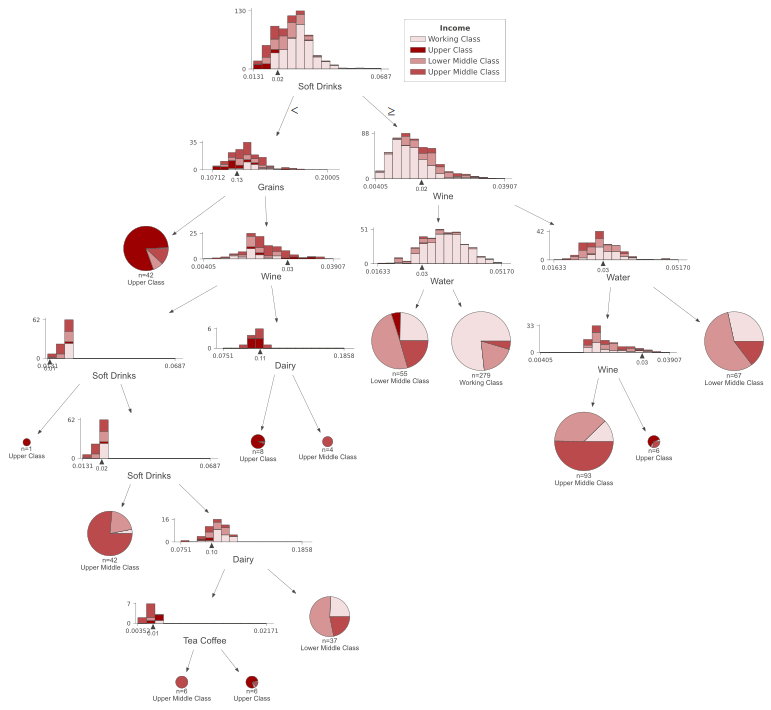

In [652]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year['Income'],
                                                    random_state=0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 20,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha':np.arange(0, 0.01, 0.0005),
                                                                      "max_features": ["log2", "sqrt", None],
                                                                      "class_weight" : [None, "balanced"],
                                                                      "min_samples_split" :np.arange(4,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, products, "Income", clf[1], reverse_dict_Income, plot_test = False, store_tree = True, file_name = "Income_Product_dt")

#### Predicting Religion based on Nutrient consumption

Best GridSeach Score:  0.6681643027405738 Best Parameter Combination:  {'decisiontreeclassifier__ccp_alpha': 0.009000000000000001, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 16, 'decisiontreeclassifier__random_state': 1}
Weighted F1 Score Result: 0.867 
Balanced Accuracy Result: 0.797 
Accuracy: 0.838
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.98      0.86      0.92       196
    Hindu Majority       0.20      1.00      0.33         3
   Muslim Majority       0.32      0.53      0.40        17

          accuracy                           0.84       216
         macro avg       0.50      0.80      0.55       216
      weighted avg       0.91      0.84      0.87       216

Storing SVG
Opening File
Accessing Object at:  ./../fierceeagle.github.io/images/Religion_Product.svg
Parsing
Writing to File


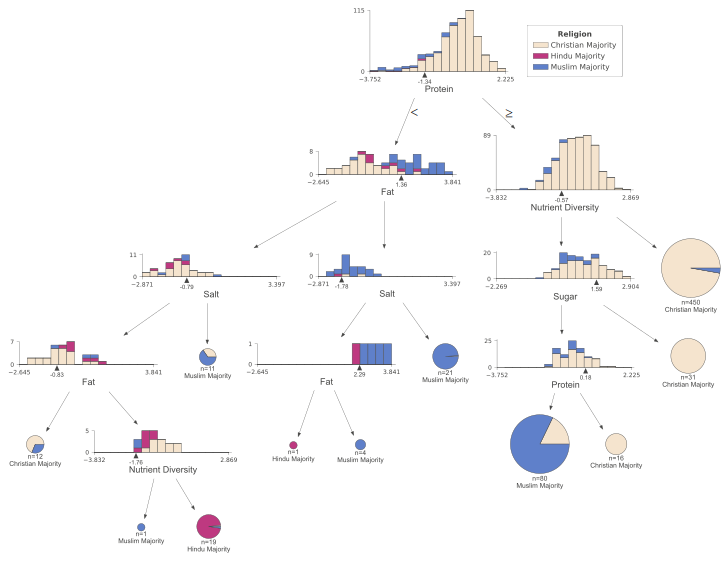

In [651]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year['Religion'],
                                                    random_state=0,
                                                    stratify = msoa_combined_outlier_year['Religion']) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 5,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha': np.arange(0, 0.01, 0.0005),
                                                                      "max_features" : ["log2", "sqrt", None],
                                                                      "class_weight" : [None, "balanced"],
                                                                      "min_samples_split" : np.arange(4,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, nutrients_hs, "Religion", clf[1], reverse_dict_Religion, plot_test = False, store_tree = True, file_name = "Religion_Product")

#### Predicting Religion based on Product consumption

Best GridSeach Score:  0.6500996053538427 Best Parameter Combination:  {'decisiontreeclassifier__ccp_alpha': 0.0085, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 12, 'decisiontreeclassifier__random_state': 1}
Weighted F1 Score Result: 0.880 
Balanced Accuracy Result: 0.698 
Accuracy: 0.866
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.96      0.90      0.93       196
    Hindu Majority       0.40      0.67      0.50         3
   Muslim Majority       0.33      0.53      0.41        17

          accuracy                           0.87       216
         macro avg       0.56      0.70      0.61       216
      weighted avg       0.90      0.87      0.88       216



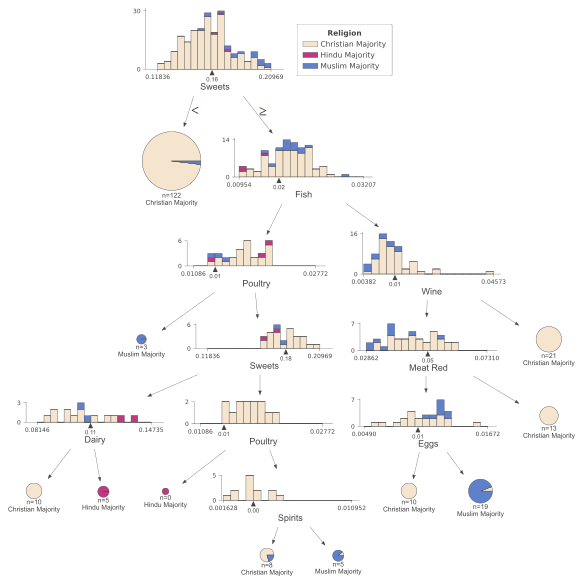

In [643]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year['Religion'],
                                                    random_state = 0,
                                                    stratify = msoa_combined_outlier_year['Religion']) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 5,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha' : np.arange(0, 0.01, 0.0005),
                                                                      "max_features" : ["log2", "sqrt", None],
                                                                      "class_weight" : [None, "balanced"],
                                                                      "min_samples_split" : np.arange(4,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, products, "Religion", clf[1], reverse_dict_Religion)

#### Predicting Education based on Nutrient consumption

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs],
                                                    msoa_combined_outlier_year['Education'],
                                                    random_state = 0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 5,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha':np.arange(0.001, 0.01, 0.0005),
                                                                      "class_weight" : [None, "balanced"],
                                                                      "max_features": ["log2", "sqrt", None],
                                                                      "min_samples_split" : np.arange(2,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, nutrients_hs, "Education", clf[1], reverse_dict_Education)

#### Predicting Education based on Product consumption

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[products],
                                                    msoa_combined_outlier_year['Education'],
                                                    random_state = 0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x,
                                                        train_y,
                                                        cv = 5,
                                                        scoring = "balanced_accuracy",
                                                        parameters = {"criterion" : ["gini", "entropy"],
                                                                      "random_state" : [1],
                                                                      'ccp_alpha':np.arange(0.001, 0.01, 0.0005),
                                                                      "class_weight" : [None, "balanced"],
                                                                      "max_features": ["log2", "sqrt", None],
                                                                      "min_samples_split" : np.arange(2,20, 4)},
                                                        resampler = True)

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, test_x, test_y, products, "Education", clf[1], reverse_dict_Education)

#### Learning Rules that allows us to explore Interrelations between interactions
<a id='AssociationRule'></a>

We use the discretization based on the clustering to analyse frequently found commonalities between nutrient consumption and socio-economic make-up of an area founding on frequent item set and association rule mining. 

In [51]:
msoa_combined_items = msoa_combined_year[products].copy()
msoa_combined_items.columns = [x.split("_")[1] for x in products]
cleaned_names = [x.split("_")[1] for x in products]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)

# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset

for col in msoa_combined_items.columns:
    lower  =  msoa_combined_items[col].quantile(0.25)
    middle =  msoa_combined_items[col].quantile(0.5)
    higher =  msoa_combined_items[col].quantile(0.75)
    msoa_combined_items[col + "_Low"] = msoa_combined_items[col].apply(lambda x : x < lower)
    msoa_combined_items[col + "_Low_to_Middle"] = msoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    msoa_combined_items[col + "_Middle_to_High"] = msoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    msoa_combined_items[col + "_High"] = msoa_combined_items[col].apply(lambda x : x > higher)
    msoa_combined_items = msoa_combined_items.drop(col, axis = 1)
    
msoa_combined_items = msoa_combined_items.join(pd.get_dummies(msoa_social[["Education","Ethnicity","Religion","Income"]]).applymap(lambda x: True if x == 1 else False))

In [52]:
print("Computing Frequent Itemset ...")
# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(msoa_combined_items, min_support = 0.05, use_colnames = True)

# Use Association Rules as an "explainable" Model

print("Computing Association Rules ...")
rules_association = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
print("Cleaning Rule Set for desiered Rules ...")
rules = rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not any([True if y in nutrient_sets else False for y in x["consequents"]])  else False, axis = 1)].sort_values(by = "confidence", ascending = False)

Computing Frequent Itemset ...
Computing Association Rules ...
Cleaning Rule Set for desiered Rules ...


In [53]:
rules[["support","confidence", "lift"]] = rules[["support","confidence", "lift"]].applymap(lambda x : round(x,3))
rules = rules[["antecedents", "consequents", "support","confidence", "lift"]]
print("In this dataframe we have " + str(rules.shape[0]) + " rules. That's a tad much.")

In this dataframe we have 7813 rules. That's a tad much.


In [54]:
def set_equals(set1, set2):
    if set1.issuperset(set2) and set1.issubset(set2):
        return True
    else:
        return False

In [55]:
groups_with_rules = set()
for idx, row in rules.iterrows():
    groups_with_rules.add(row["consequents"])

In [56]:
group_rules = []
ix = {}
revix = {}
for idx,group in enumerate(groups_with_rules):
    newdf = rules[rules.apply(lambda x: True if set_equals(x["consequents"],group) else False, axis = 1)]
    newdf = newdf[newdf["lift"] >= 1]
    newdf.sort_values(["lift","confidence"],ascending=False,inplace=True)
    name = newdf["consequents"].iloc[0]
    ix[name] = idx
    revix[idx] = name
    group_rules.append(newdf)

In [57]:
for x in groups_with_rules:
    print(x)

frozenset({'Religion_Christian Majority'})
frozenset({'Religion_Christian Majority', 'Ethnicity_White Majority', 'Education_Academic Degree'})
frozenset({'Ethnicity_White Majority'})
frozenset({'Religion_Christian Majority', 'Ethnicity_Strong Black Minority'})
frozenset({'Ethnicity_Strong Black Minority'})
frozenset({'Education_Academic Degree'})
frozenset({'Income_Working Class', 'Education_Secondary School'})
frozenset({'Religion_Christian Majority', 'Ethnicity_White Majority'})
frozenset({'Ethnicity_White Majority', 'Education_Secondary School'})
frozenset({'Ethnicity_Asian Majority', 'Income_Working Class', 'Education_Secondary School'})
frozenset({'Ethnicity_Asian Majority'})
frozenset({'Ethnicity_Asian Majority', 'Education_Secondary School'})
frozenset({'Education_Secondary School'})
frozenset({'Religion_Christian Majority', 'Education_Secondary School'})
frozenset({'Religion_Christian Majority', 'Income_Working Class', 'Education_Secondary School'})
frozenset({'Ethnicity_White 

In [58]:
def antecedent_jaccard_scores(group_rules):
    antecedent_sets = []
    for group in group_rules:
        antecedents = set()
        for idx, row in group.iterrows():
            antecedents.add(row["antecedents"])
        antecedent_sets.append(antecedents)
    jaccard = np.zeros((len(group_rules),len(group_rules)))
    for ix1, group1 in enumerate(antecedent_sets):
        for ix2, group2 in enumerate(antecedent_sets):
            jaccard[ix1][ix2] = round((len(group1.intersection(group2))/len(group1.union(group2))),3)
    return jaccard        

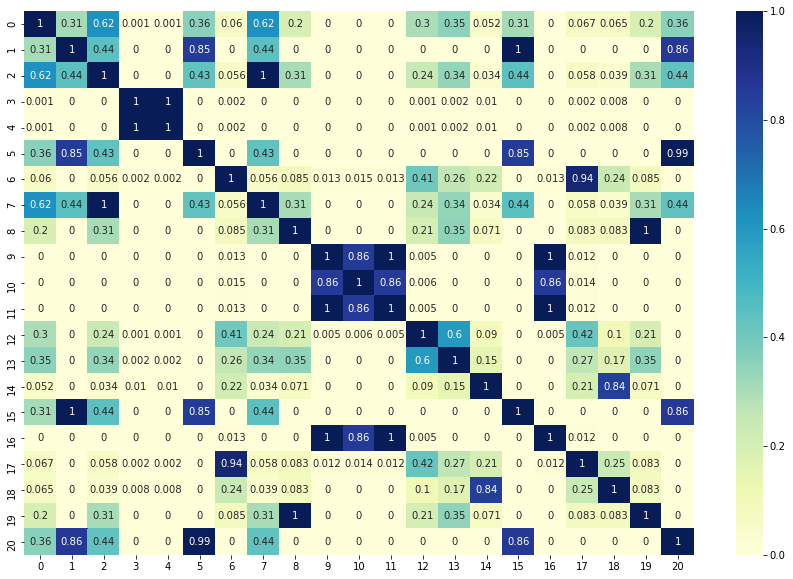

In [59]:
jaccard_scores = antecedent_jaccard_scores(group_rules)
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(jaccard_scores,annot=True, ax=ax,cmap="YlGnBu")

Well, looks like there are some identical groups in there. 

In [60]:
sim_group_ids = set()
jaccard_threshold = 0.8
for n1,row in enumerate(jaccard_scores):
    for n2,entry in enumerate(row):
        if entry >= jaccard_threshold and n1 != n2:
            sim_group_ids.add(frozenset([n1,n2]))
i = 0
sim_group_ids = list(sim_group_ids)
while i < len(sim_group_ids):
    changes = True
    while changes:
        changes = False
        for j in range(len(sim_group_ids) - 1, i, -1):
            if not sim_group_ids[i].isdisjoint(sim_group_ids[j]):
                changes = True
                sim_group_ids[i] |= sim_group_ids[j]
                del sim_group_ids[j]
    i += 1

In [63]:
all_groups = list(range(len(ix)))
done_reps = []
best_representatives = []
for similar in sim_group_ids:
    best_rep = -1
    for rep in similar:
        done_reps.append(rep)
        if best_rep == -1 or group_rules[rep]["lift"].median() > group_rules[best_rep]["lift"].median():
            best_rep = rep
    best_representatives.append(best_rep)
    print("The following groups have very similar antecedent sets (jaccard scores of > " + str(jaccard_threshold) + "):")
    for x in similar:
        print(x, revix[x])
    print("============================================================================================================")
for rep in done_reps:
    all_groups.remove(rep)
for rep in all_groups:
    best_representatives.append(rep)

The following groups have very similar antecedent sets (jaccard scores of > 0.8):
1 frozenset({'Religion_Christian Majority', 'Ethnicity_White Majority', 'Education_Academic Degree'})
20 frozenset({'Religion_Christian Majority', 'Education_Academic Degree'})
5 frozenset({'Education_Academic Degree'})
15 frozenset({'Ethnicity_White Majority', 'Education_Academic Degree'})
The following groups have very similar antecedent sets (jaccard scores of > 0.8):
3 frozenset({'Religion_Christian Majority', 'Ethnicity_Strong Black Minority'})
4 frozenset({'Ethnicity_Strong Black Minority'})
The following groups have very similar antecedent sets (jaccard scores of > 0.8):
16 frozenset({'Ethnicity_Asian Majority', 'Income_Working Class'})
9 frozenset({'Ethnicity_Asian Majority', 'Income_Working Class', 'Education_Secondary School'})
10 frozenset({'Ethnicity_Asian Majority'})
11 frozenset({'Ethnicity_Asian Majority', 'Education_Secondary School'})
The following groups have very similar antecedent sets

In [64]:
reduced_group_rules = []
ix = {}
revix = {}
for rep in best_representatives:
    name = group_rules[rep]["consequents"].iloc[0]
    ix[name] = len(reduced_group_rules)
    revix[len(reduced_group_rules)] = name
    newdf = group_rules[rep]
    newdf = newdf[newdf["lift"] >= 1.867]
    newdf = newdf[newdf["confidence"] >= 0.65]
    reduced_group_rules.append(newdf)

In [65]:
reduced_filtered_group_rules = []
group_antecedents = []
for rules in reduced_group_rules:
    antecedents = set()
    remove = set()
    for idx, row in rules.iterrows():
        antecedents.add(row["antecedents"])
    for x in antecedents:
        for y in antecedents:
            if not set_equals(x,y) and x.issubset(y):
                remove.add(x)
    for x in remove:
        antecedents.remove(x)
    group_antecedents.append(antecedents)
    newdf = rules.copy()
    newdf = newdf[newdf.apply(lambda x: True if x["antecedents"] in list(antecedents) else False, axis=1)]
    reduced_filtered_group_rules.append(newdf)

In [66]:
rfgl_ls =  [reduced_filtered_group_rules[0][4:6],
            reduced_filtered_group_rules[1],
            reduced_filtered_group_rules[2][7:9],
            reduced_filtered_group_rules[4][23:25],
            reduced_filtered_group_rules[5],
            reduced_filtered_group_rules[6][3:5],
            reduced_filtered_group_rules[8][0:2]]

In [67]:
nice_df = pd.concat(rfgl_ls)
nice_df["antecedents"] = nice_df.apply(lambda x: ''.join([label_processor(x).capitalize() + "<br>" for x in list(x["antecedents"])]).replace("_high", u" \u21D7").replace("_low", u" \u21D8") , axis = 1)
nice_df["consequents"] = nice_df.apply(lambda x: ''.join([label_processor(x).capitalize() + "<br>" for x in list(x["consequents"])]).replace("_high", u" \u21D7").replace("_low", u" \u21D8").replace("_", " "), axis = 1)
fig = ff.create_table(nice_df,height_constant=100)
path = "../fierceeagle.github.io/_includes/AssociationRuleTable_Nutrients.html"
fig.write_html(path)
plot_map_inline(path)

#### The ugly Duckling Plots

The Plots that not made the cut, but also can't be denied in their artistic avantgardeness

In [ ]:
multilayer_map_plot_factory(msoa_unfiltered_year,
                            geojson = msoa_dict,
                            layers = nutrients,
                            data_type = "categorical",
                            zoom = 9,
                            opacity = 0.65,
                            hovertemplate = "%{z}",
                            title = "Nutrient Consumption in MSOAs in London",
                            hook = True,
                            file_name = "Multilayer_Nutrient_Plot_Avantgarde",
                            height = 800)

# Merry Christmas

In [ ]:
# Calculate spiral coordinates for the Xmas tree
theta = np.linspace(-8 * np.pi, 8 * np.pi, 200) 
z = np.linspace(-3, 0, 200)
r = 5
x = r * np.sin(theta)*z
y = r * np.cos(theta)*z
 
# Use matplotib and its OOP interface to draw it 
fig = plt.figure(figsize  = (15,15)) # Create figure
fig.set
ax = fig.gca(projection='3d') # It's a 3D Xmas tree!
ax.view_init(15, 0) # Set a nice view angle
ax._axis3don = False # Hide the 3d axes
 
# Plot the Xmas tree as a line
ax.plot(x, y, z,
        c='green', linewidth=2.5)
 
# Every Xmas tree needs a star
ax.scatter(0, 0, 0.2,
           c='red', s=250, marker='*')
 
# Type here your best whishes
ax.set_title(u"¡Feliz Navidad!")
 
plt.show()